In [68]:
# Import library and framework
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as Data

%matplotlib inline
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import time

In [69]:
# Parameter Claim
BATCH_SIZE = 512     # Batch Size
LR         = 0.1    # Initial Learning Rate
FREQ_SSR   = 4        # Times for showing accuracy for each epoch
EPOCH      = 1       # Training Epoches
SAVE_ALL   = True     # SAVE ALL model or just architecture
IMAGE_SIZE = 32       # Image dimension
DO_TRAIN   = True     # Do trian or only inference
DOWNLOAD_MNIST = True

train_size =112
Show = 2
Show = int(Show)

In [70]:
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=DOWNLOAD_MNIST,)

test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)

In [71]:
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = Data.DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=True)

In [72]:
test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:700]/255.
test_y = test_data.test_labels[:700]

In [73]:
validation_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[700:1400]/255.
validation_y = test_data.test_labels[700:1400]

In [74]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1= nn.Sequential(
            nn.Conv2d(1,16,5,1,2),
            nn.ReLU(),
            nn.MaxPool2d(2),
            )
        self.conv2= nn.Sequential(
            nn.Conv2d(16,32,5,1,2),
            nn.ReLU(),
            nn.MaxPool2d(2),
            )
        self.Linear1= nn.Sequential(
            nn.Linear(1568,10),
            )
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        output = self.Linear1(x)
        return output
cnn = CNN()

In [75]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

In [77]:
for epoch in range(EPOCH):
    cnt_ratio = 0
    for step, (b_x, b_y) in enumerate(train_loader):
        if(cnt_ratio > train_size):
            break
        cnt_ratio+=1
        output = cnn(b_x)
        _, train_pred = torch.max(output.data,1)
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_correct = torch.sum(train_pred == b_y.data)
        train_accuracy = float(running_correct) / float(BATCH_SIZE)
        if( ((step % Show) == 0) or (step == (train_size-1))  ):
            print('Epoch: ', epoch, step,'| train loss: %.4f' % loss.data.numpy(), '| train accuracy: %.2f' % train_accuracy)

            test_output = cnn(validation_x)
            loss = loss_func(test_output, validation_y)
            pred_y = torch.max(test_output, 1)[1].data.squeeze().numpy()
            accuracy = float((pred_y == validation_y.data.numpy()).astype(int).sum()) / float(validation_y.size(0))
            print('Epoch: ', epoch, step, '| validation loss: %.4f' % loss.data.numpy(), '| validation accuracy: %.2f' % accuracy)

        if((step == (train_size-1))):
            break

Epoch:  0 0 | train loss: 233.5760 | train accuracy: 0.09
Epoch:  0 0 | validation loss: 8.4593 | validation accuracy: 0.12
Epoch:  0 2 | train loss: 2.3115 | train accuracy: 0.09
Epoch:  0 2 | validation loss: 2.2980 | validation accuracy: 0.13
Epoch:  0 4 | train loss: 2.2510 | train accuracy: 0.12
Epoch:  0 4 | validation loss: 2.3102 | validation accuracy: 0.23
Epoch:  0 6 | train loss: 2.3108 | train accuracy: 0.10
Epoch:  0 6 | validation loss: 2.3098 | validation accuracy: 0.13
Epoch:  0 8 | train loss: 2.3084 | train accuracy: 0.12
Epoch:  0 8 | validation loss: 2.3182 | validation accuracy: 0.13
Epoch:  0 10 | train loss: 2.3326 | train accuracy: 0.11
Epoch:  0 10 | validation loss: 2.3231 | validation accuracy: 0.13
Epoch:  0 12 | train loss: 2.3257 | train accuracy: 0.11
Epoch:  0 12 | validation loss: 2.3247 | validation accuracy: 0.13
Epoch:  0 14 | train loss: 2.3080 | train accuracy: 0.12
Epoch:  0 14 | validation loss: 2.3243 | validation accuracy: 0.13
Epoch:  0 16 | t

<IPython.core.display.Javascript object>


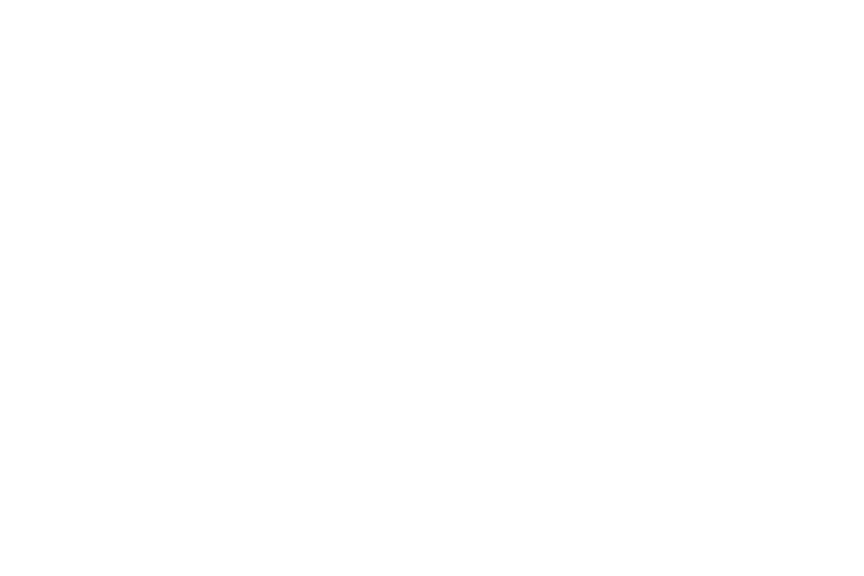

<IPython.core.display.Javascript object>


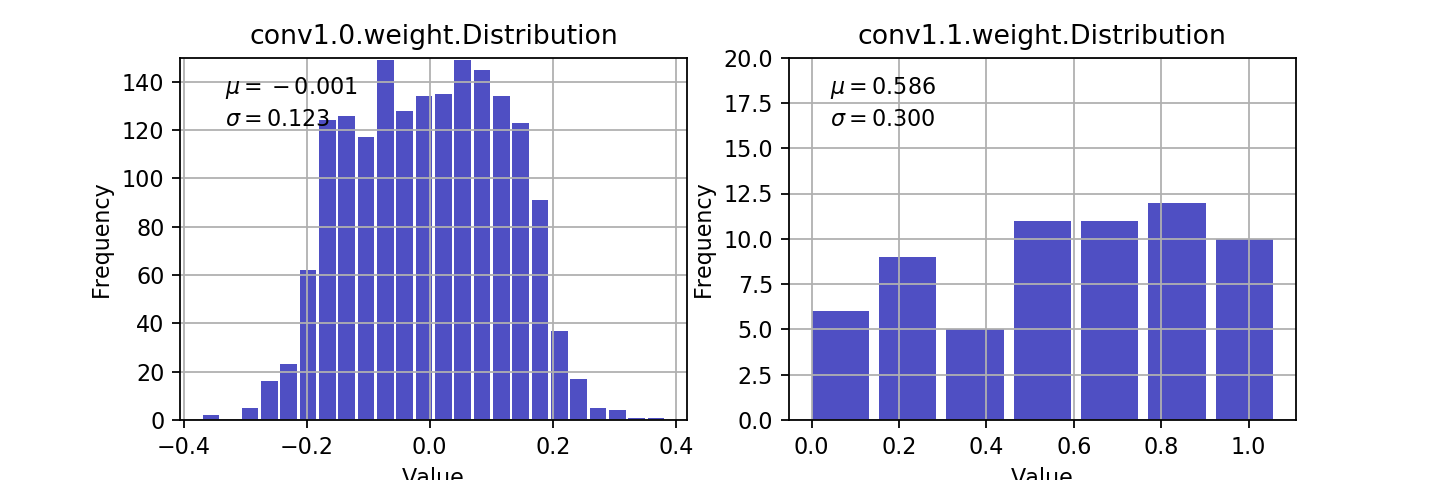

<IPython.core.display.Javascript object>


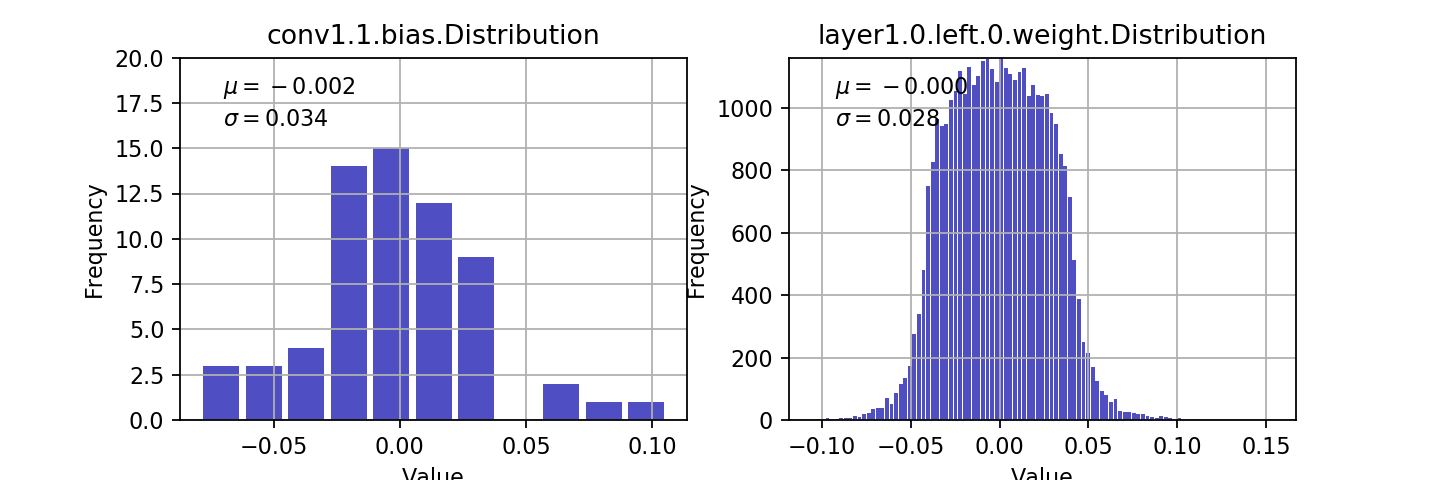

<IPython.core.display.Javascript object>


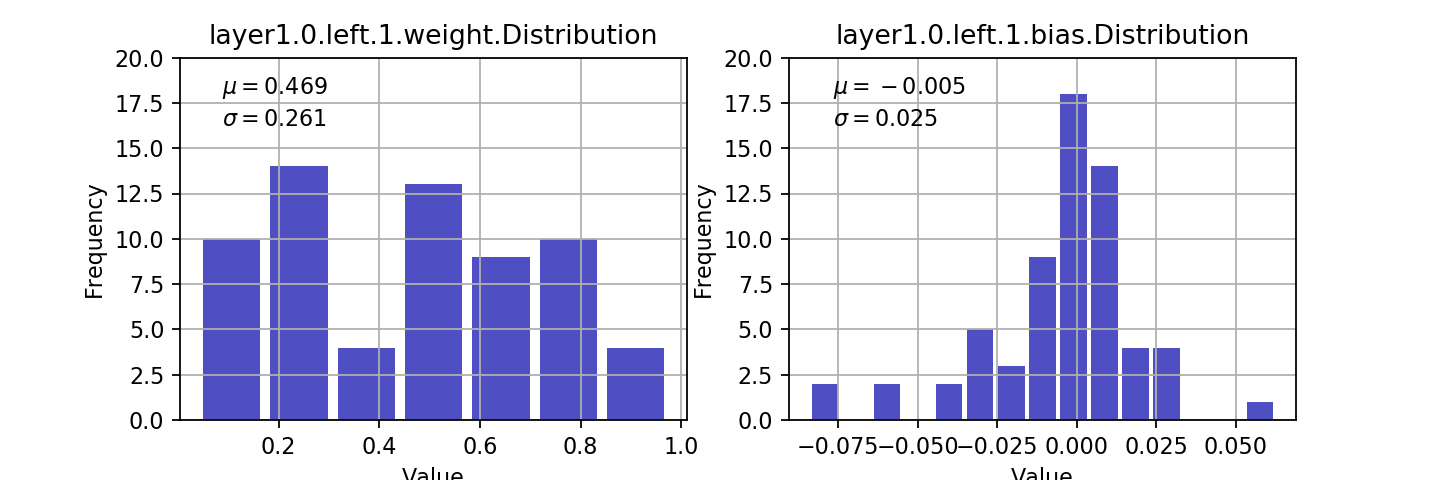

<IPython.core.display.Javascript object>


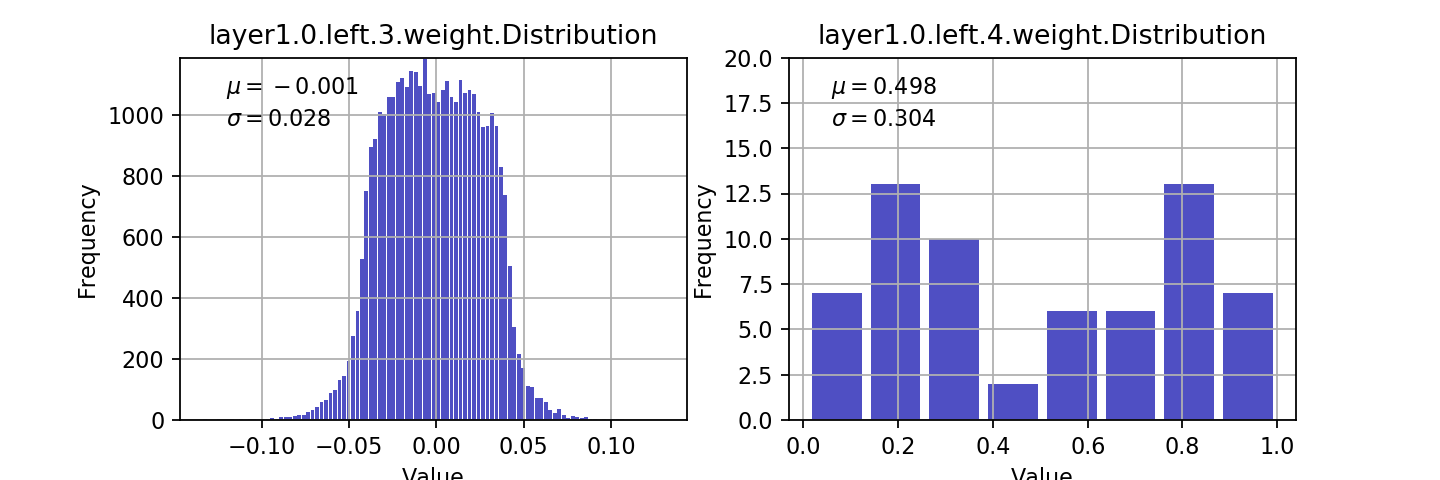

<IPython.core.display.Javascript object>


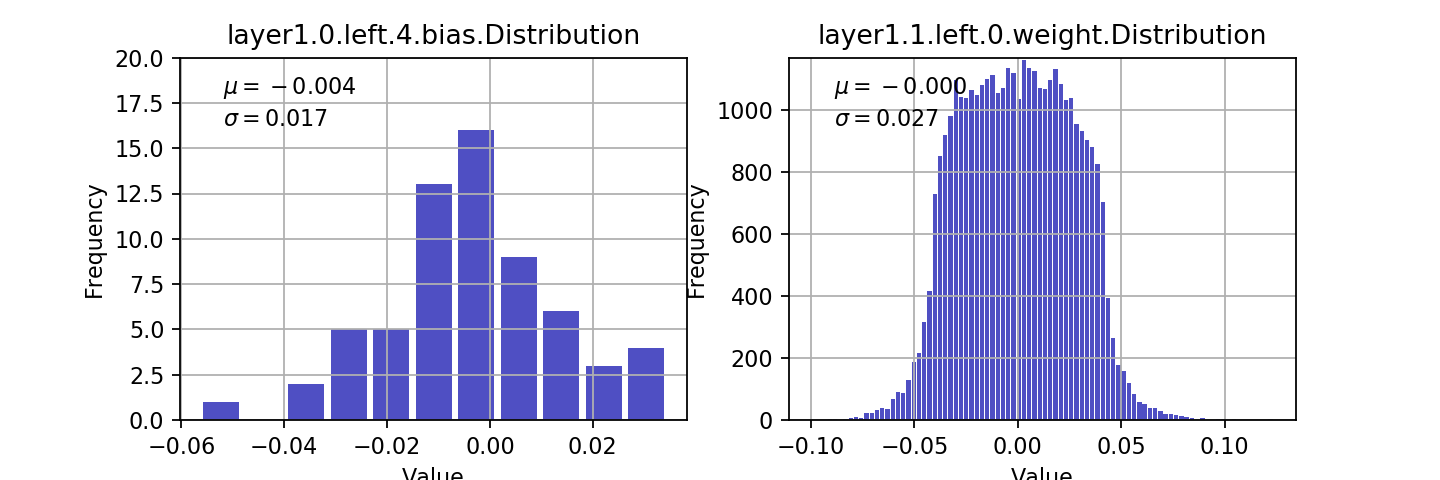

<IPython.core.display.Javascript object>


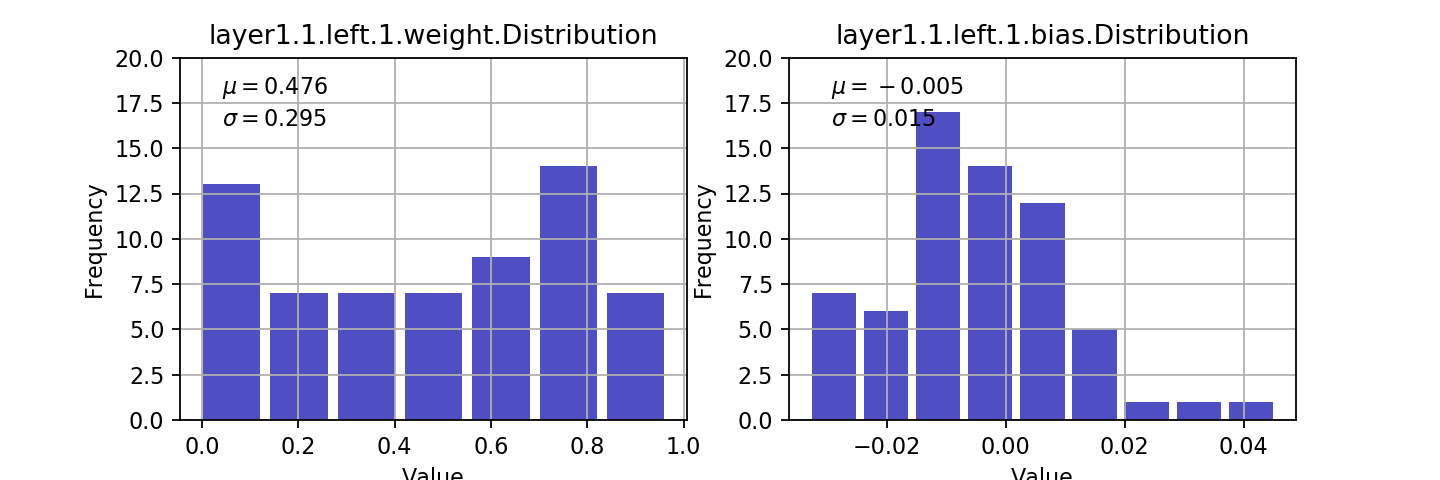

<IPython.core.display.Javascript object>


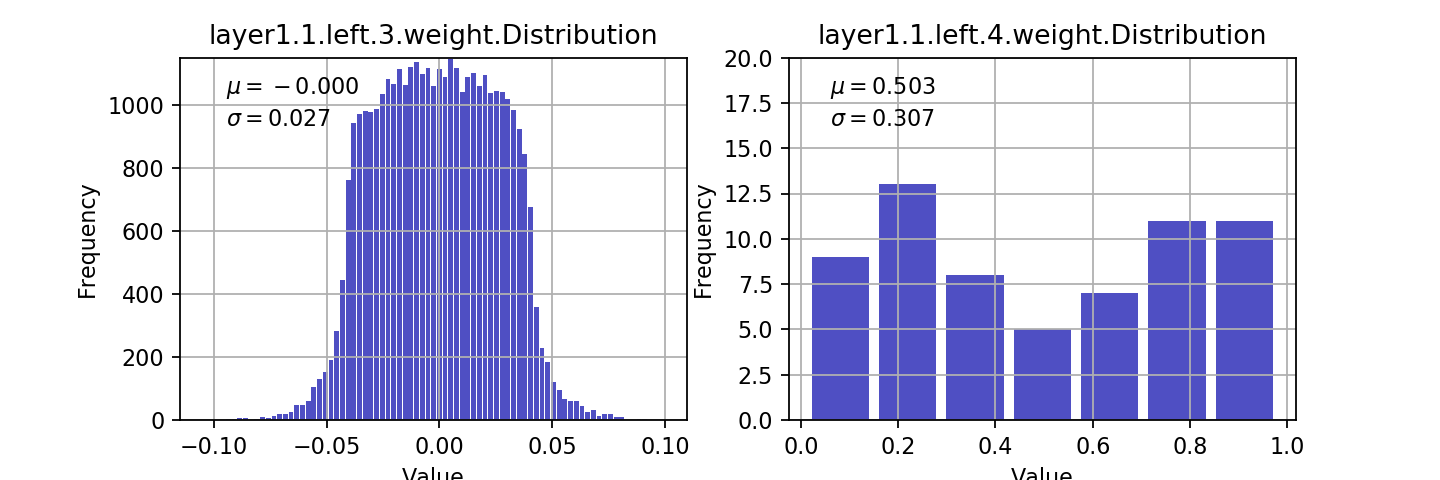

<IPython.core.display.Javascript object>


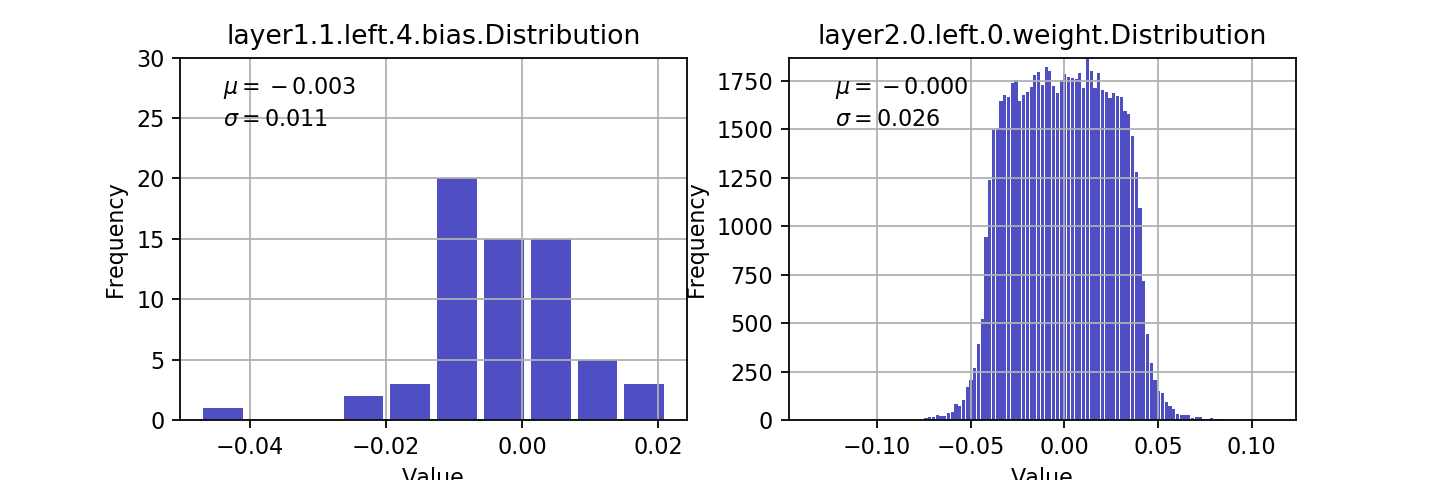

<IPython.core.display.Javascript object>


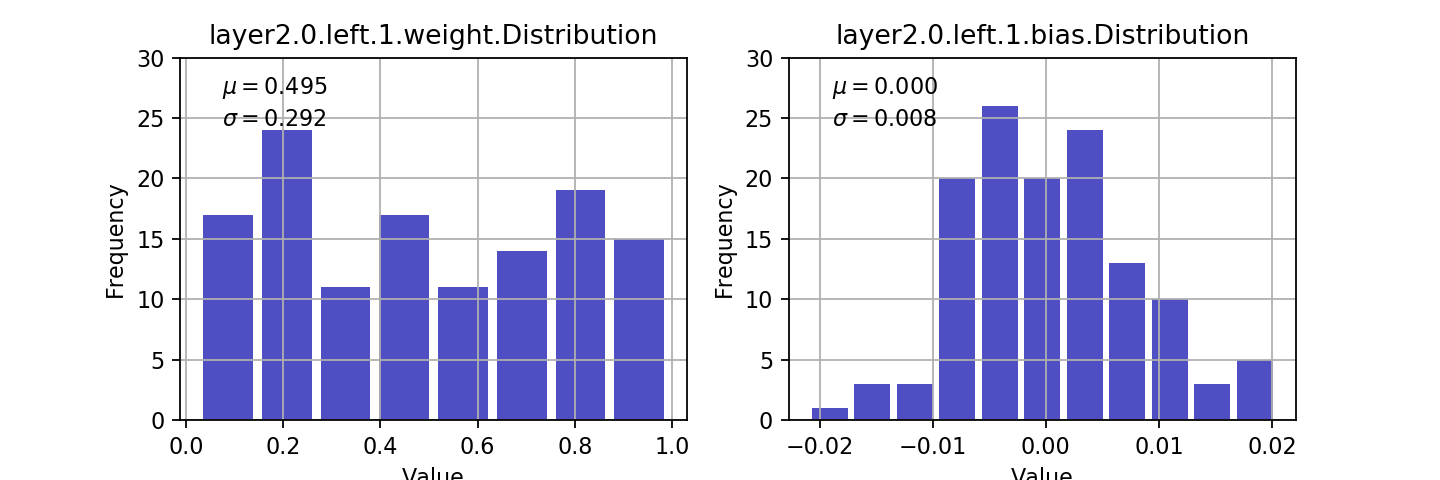

<IPython.core.display.Javascript object>


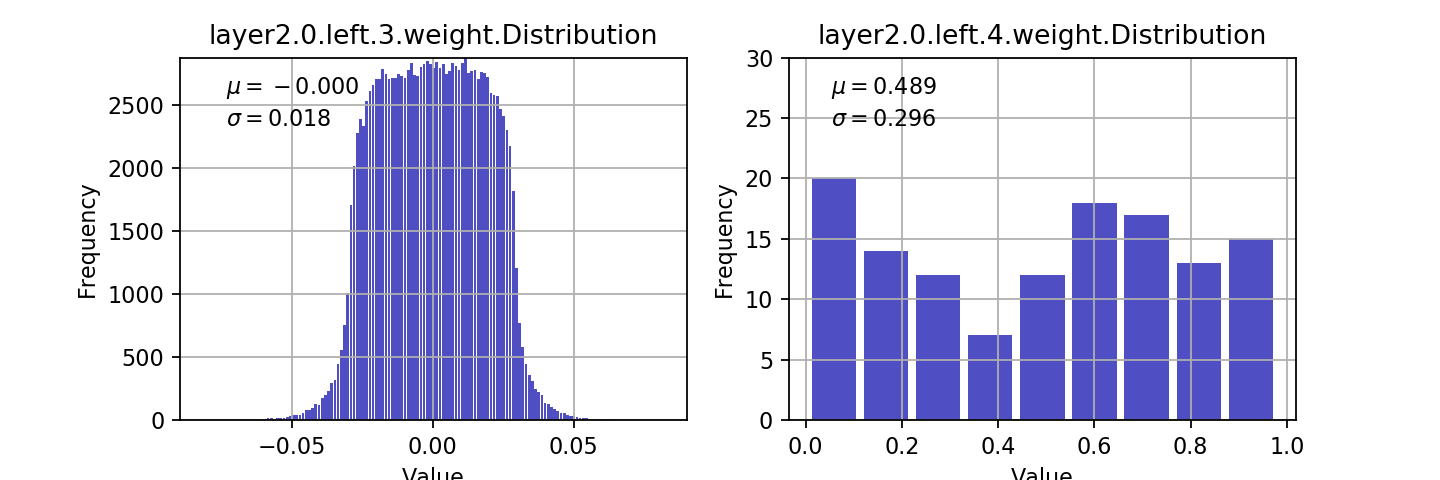

<IPython.core.display.Javascript object>


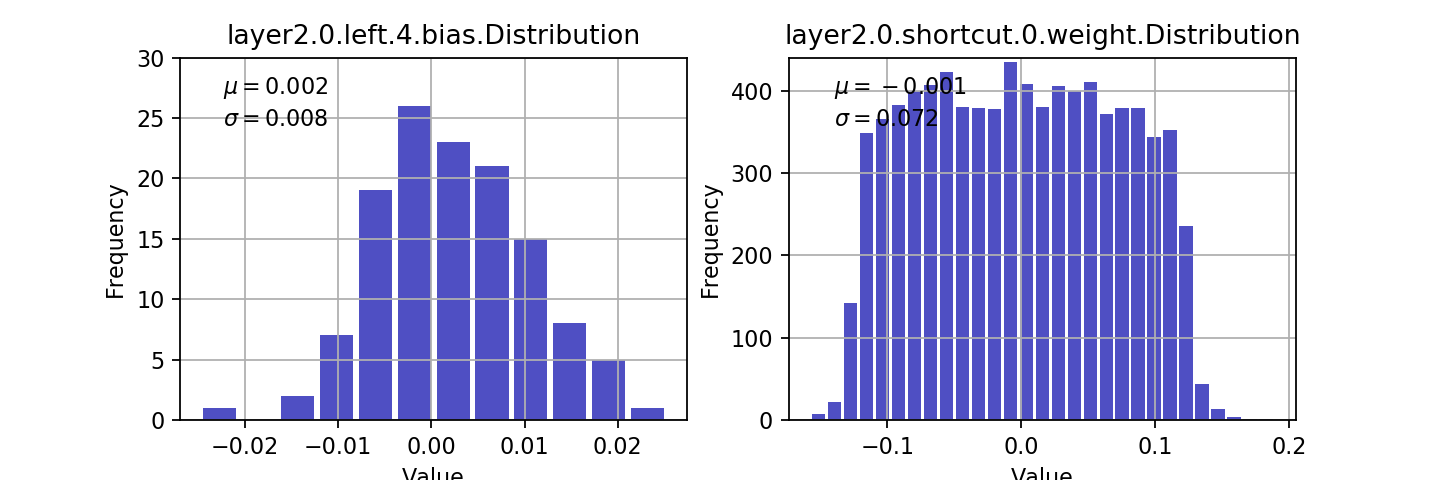

<IPython.core.display.Javascript object>


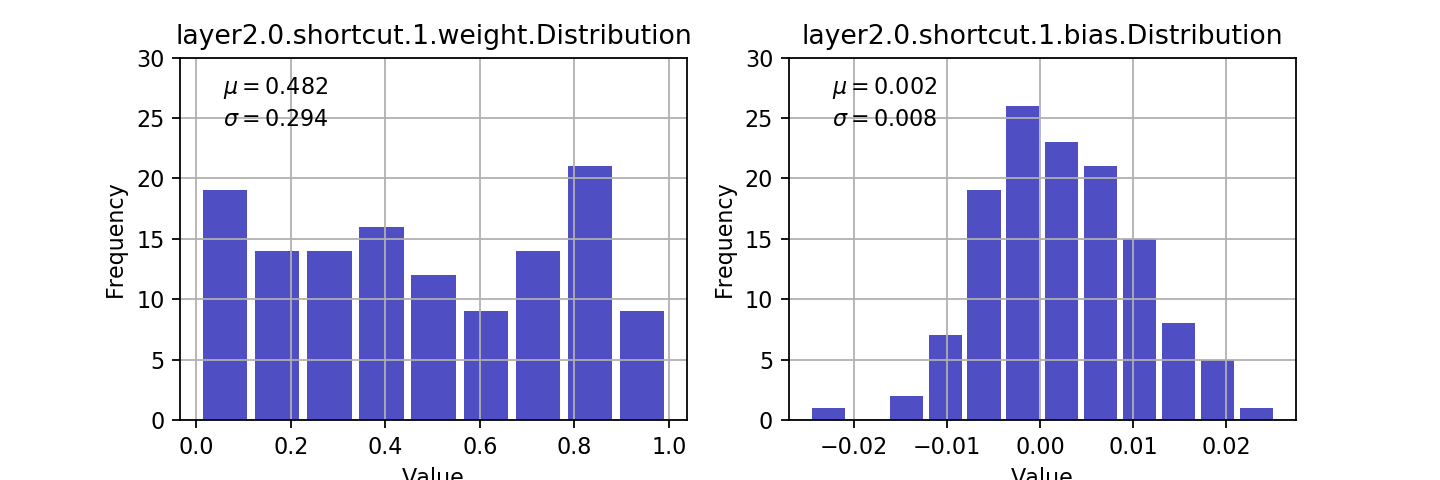

<IPython.core.display.Javascript object>


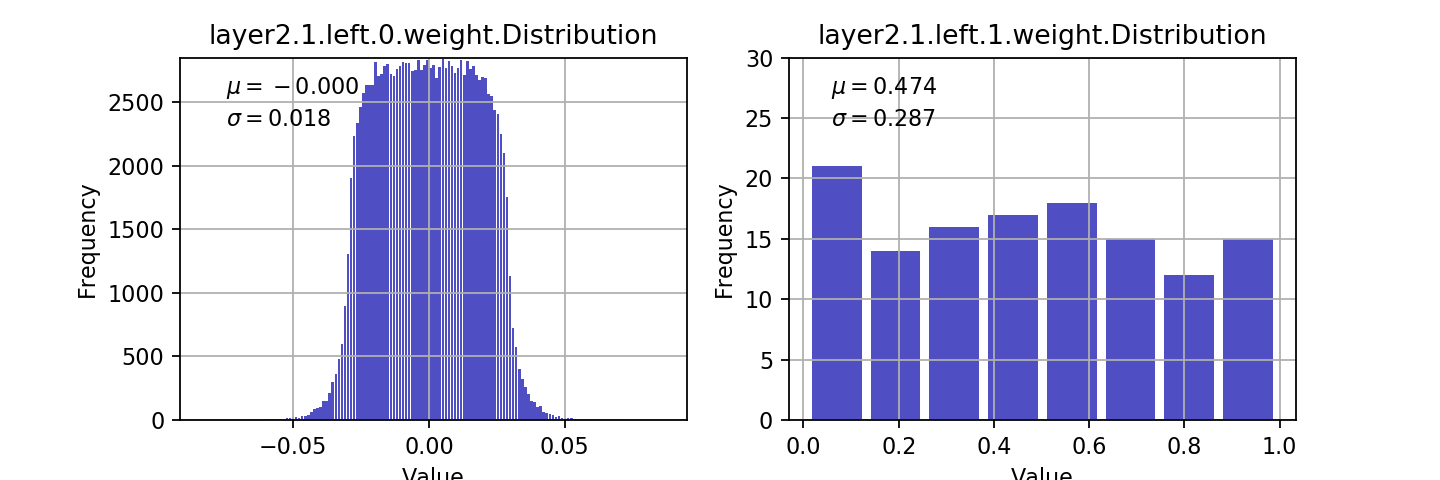

<IPython.core.display.Javascript object>


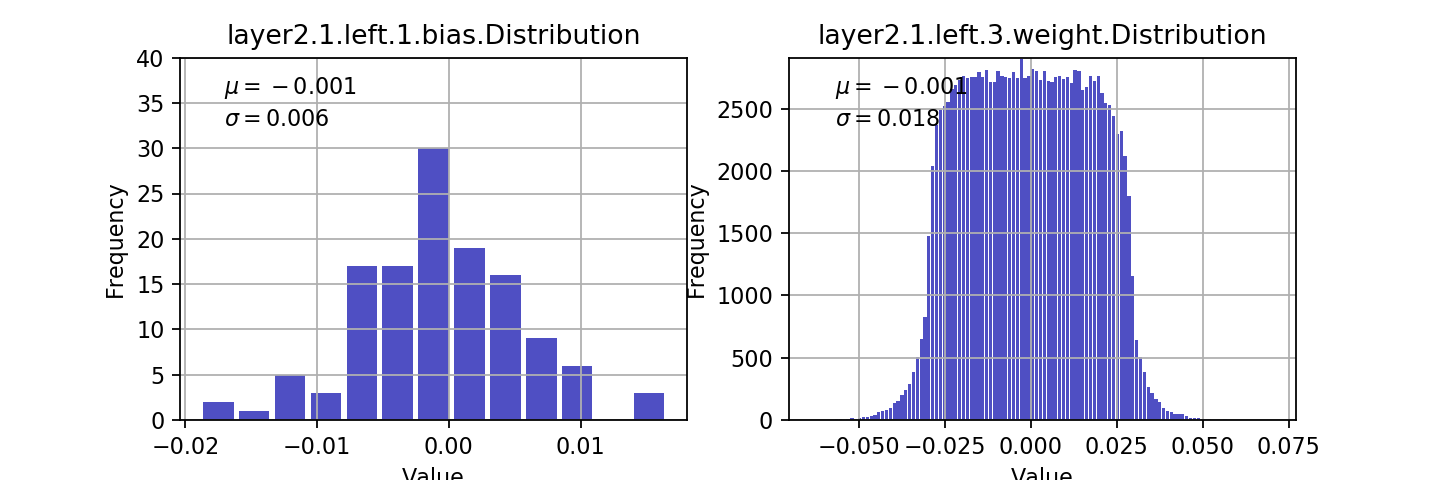

<IPython.core.display.Javascript object>


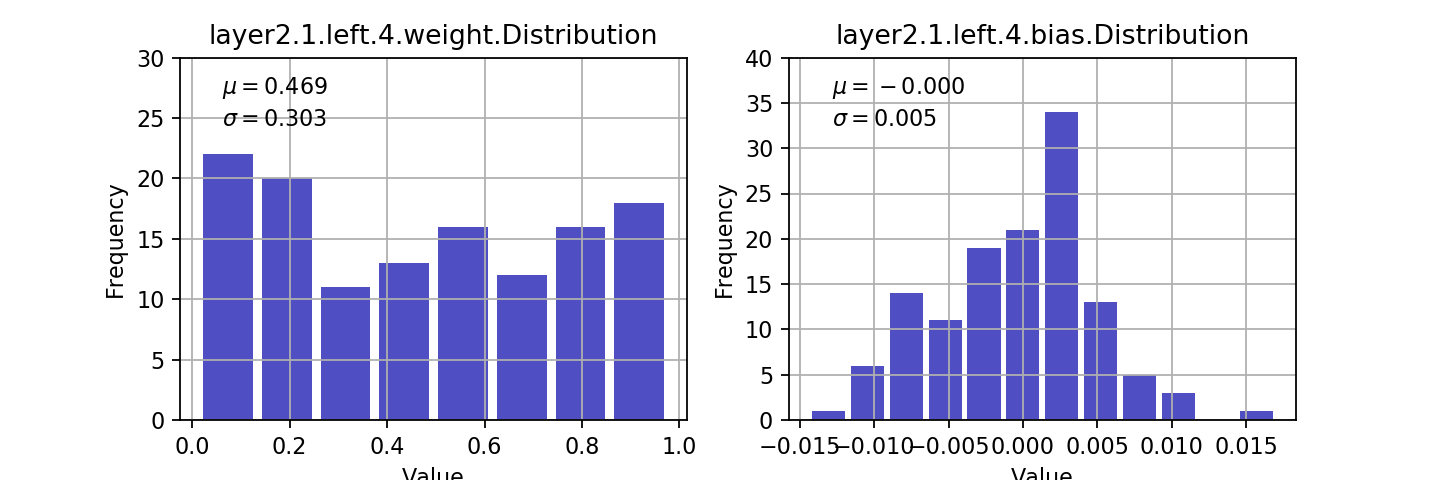

<IPython.core.display.Javascript object>


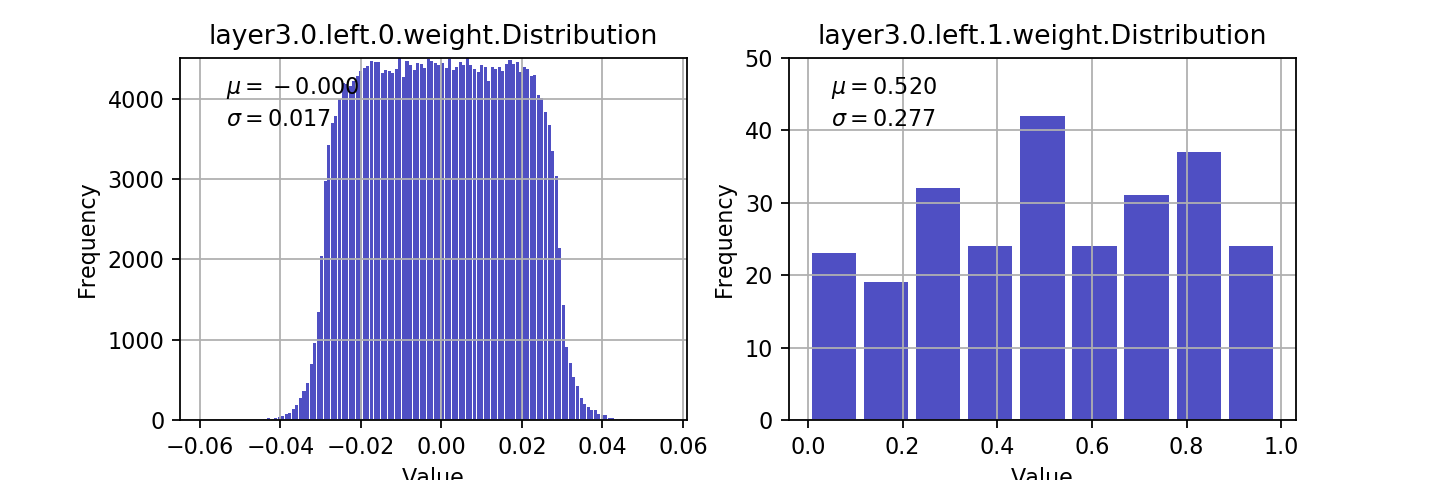

<IPython.core.display.Javascript object>


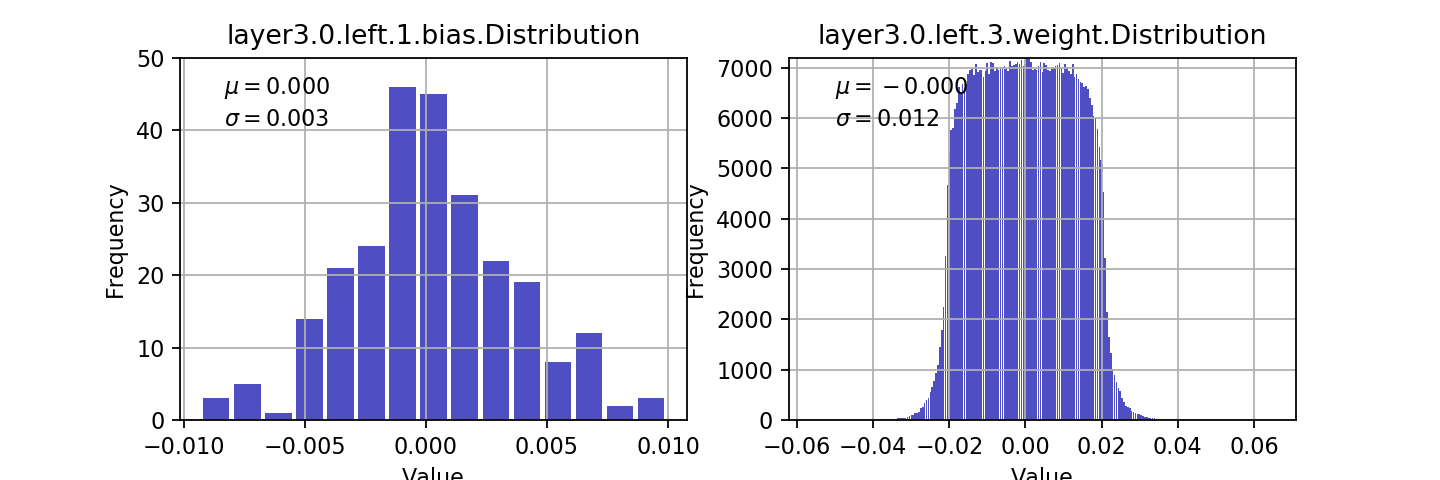

<IPython.core.display.Javascript object>


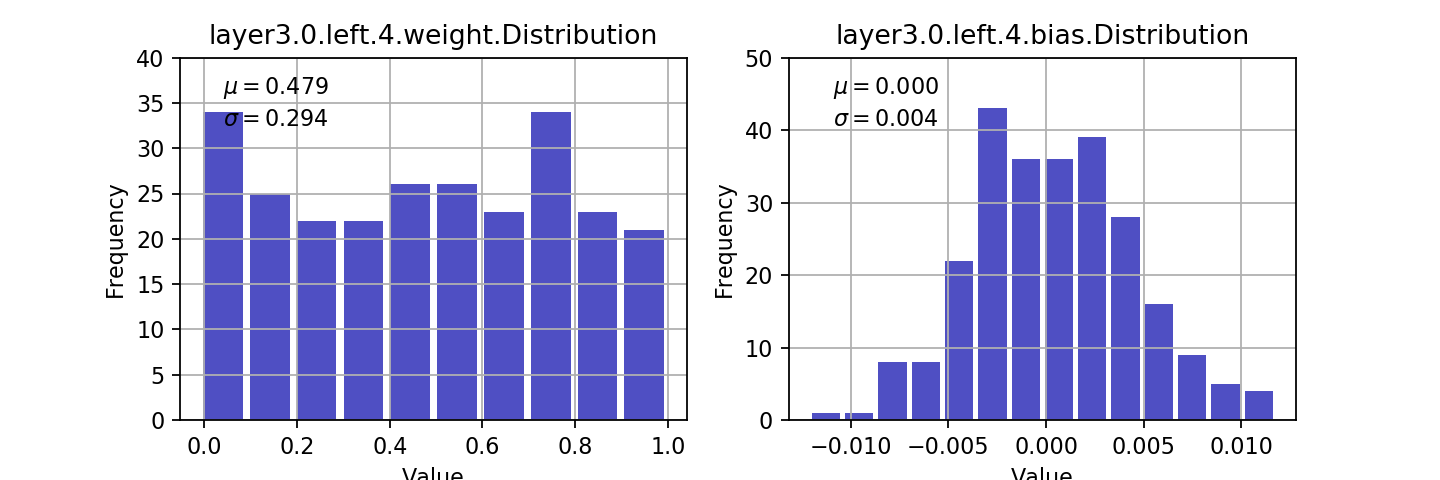

<IPython.core.display.Javascript object>


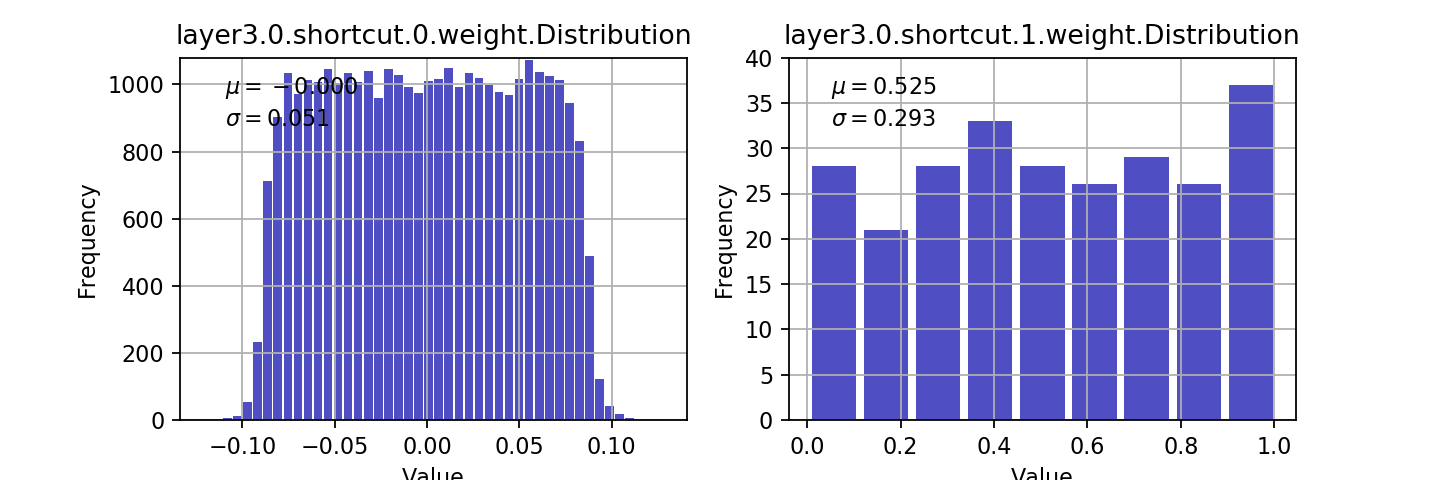

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


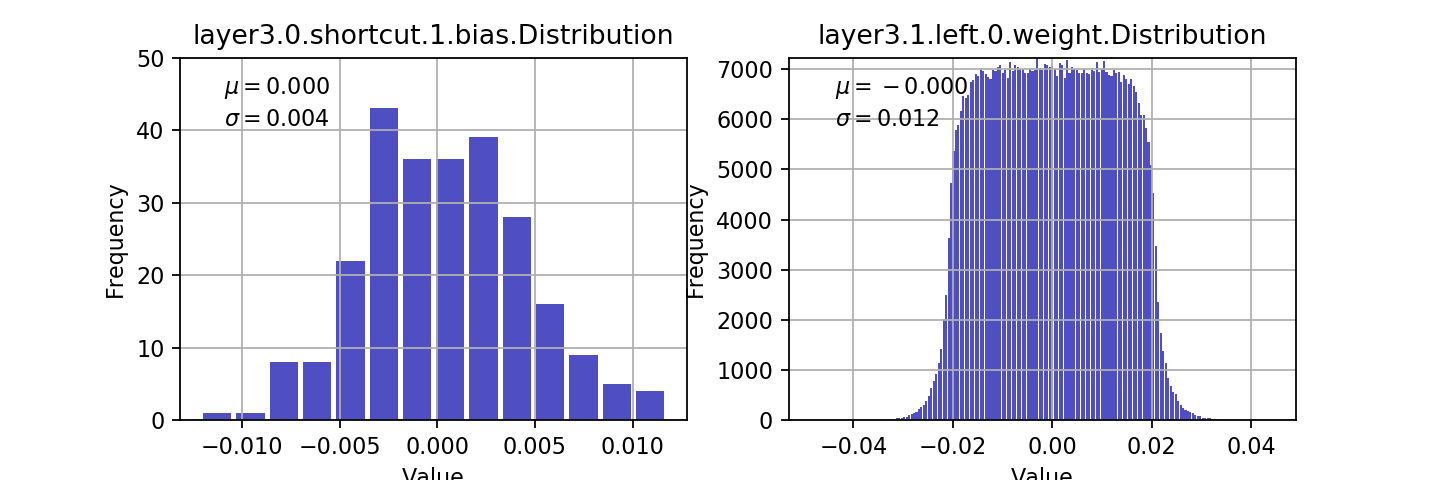

<IPython.core.display.Javascript object>


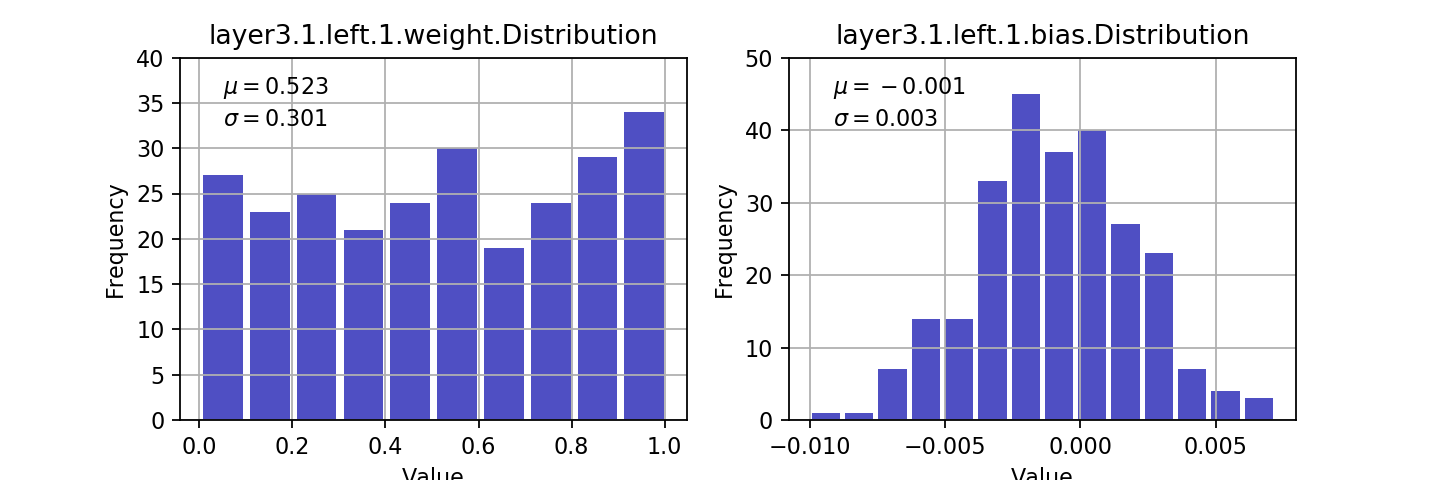

<IPython.core.display.Javascript object>


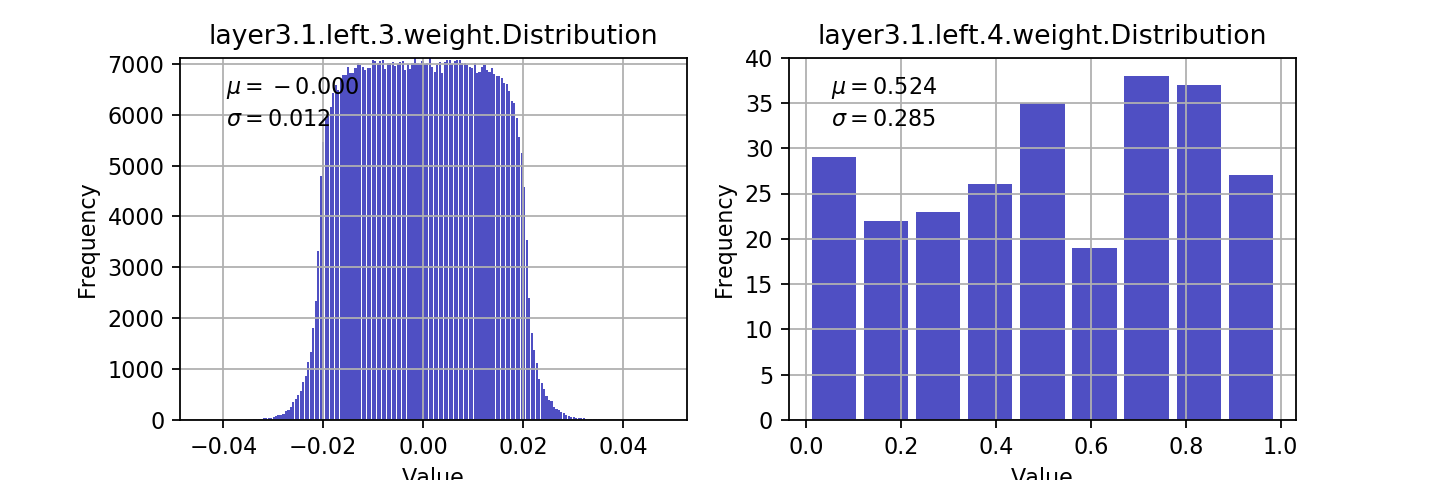

<IPython.core.display.Javascript object>


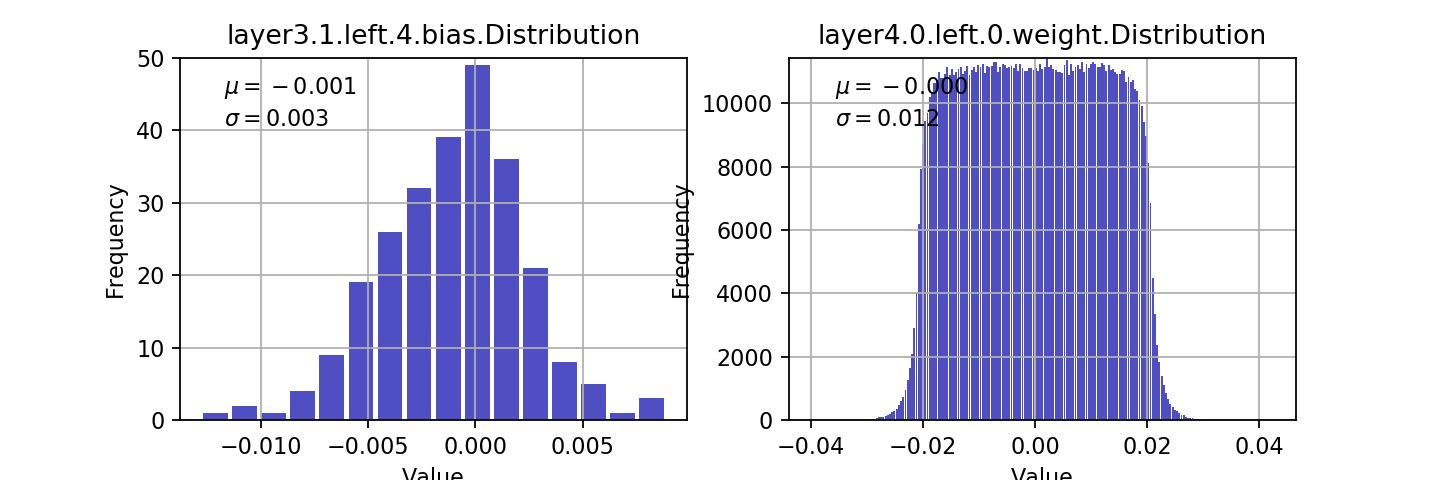

<IPython.core.display.Javascript object>


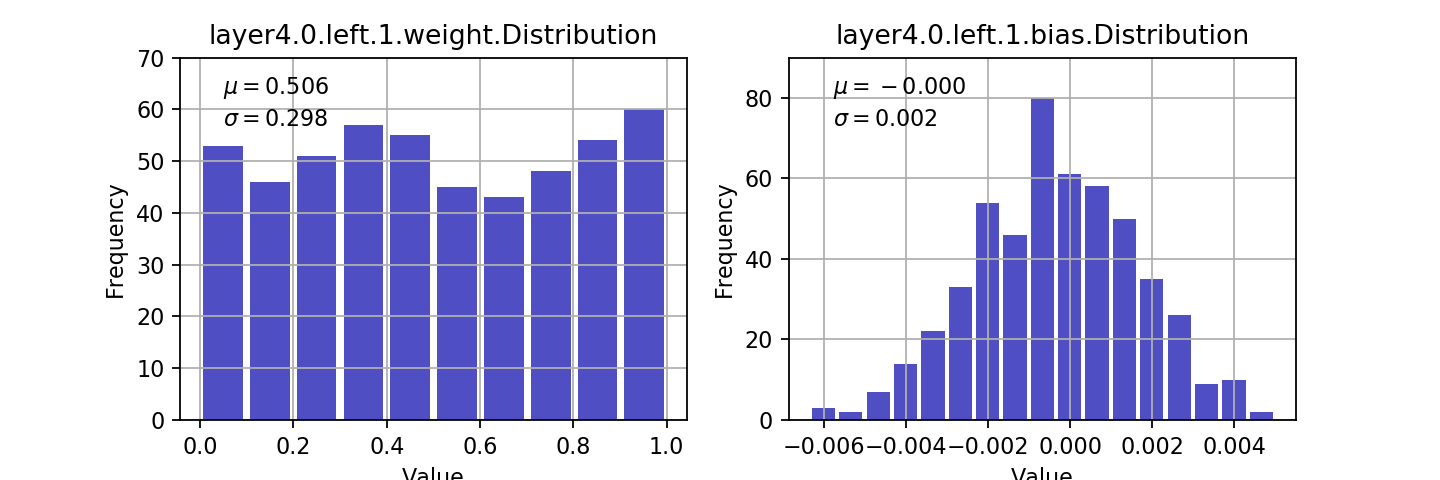

<IPython.core.display.Javascript object>


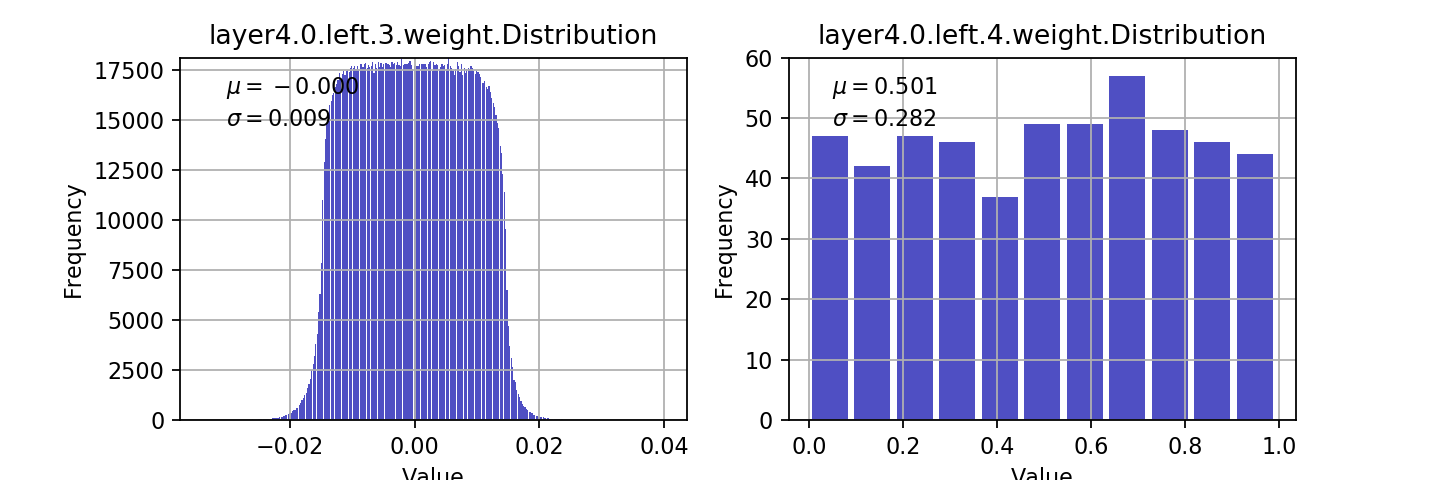

<IPython.core.display.Javascript object>


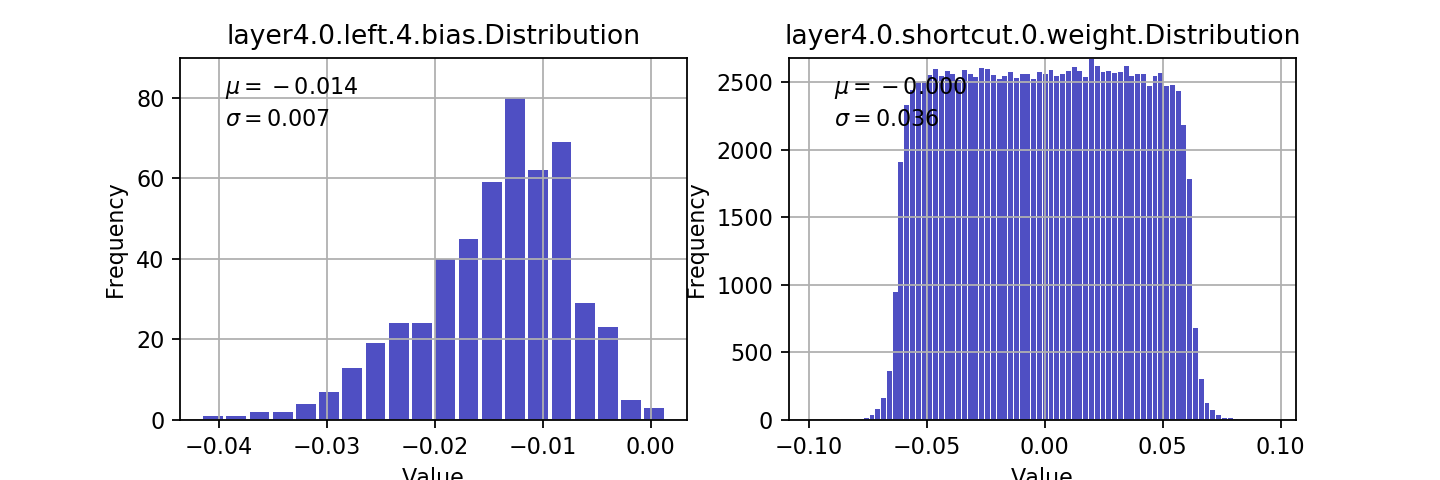

<IPython.core.display.Javascript object>


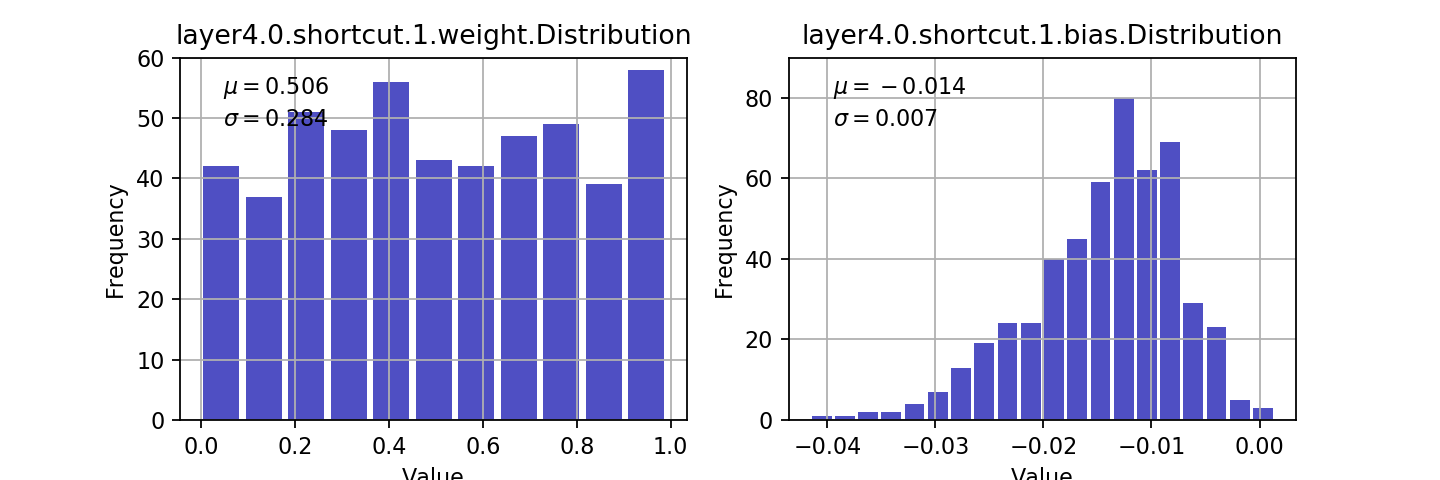

<IPython.core.display.Javascript object>


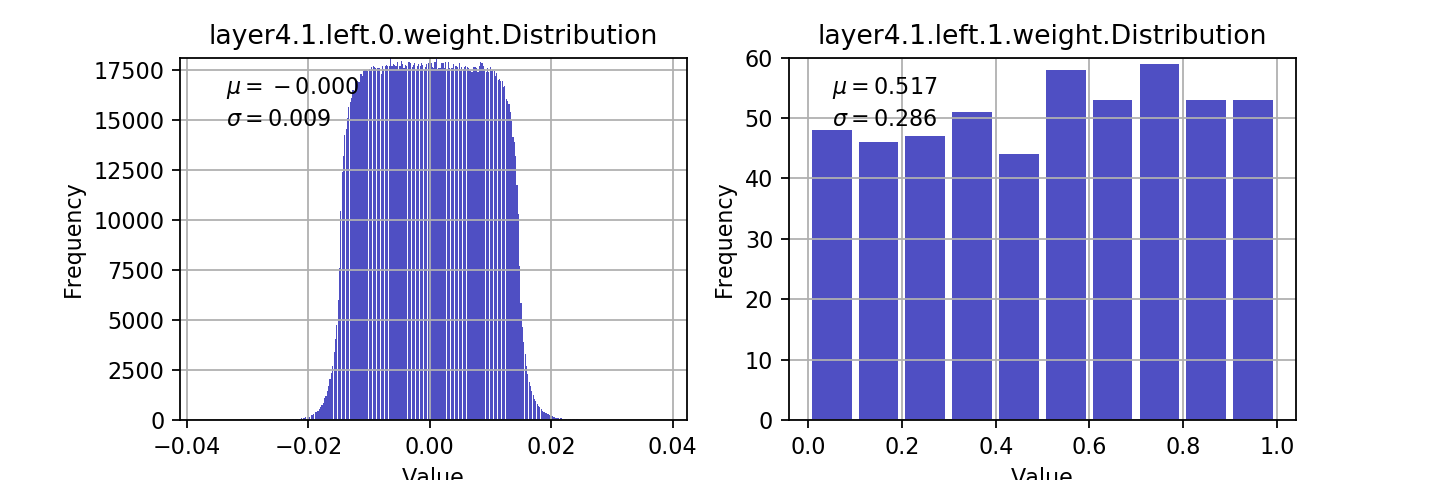

<IPython.core.display.Javascript object>


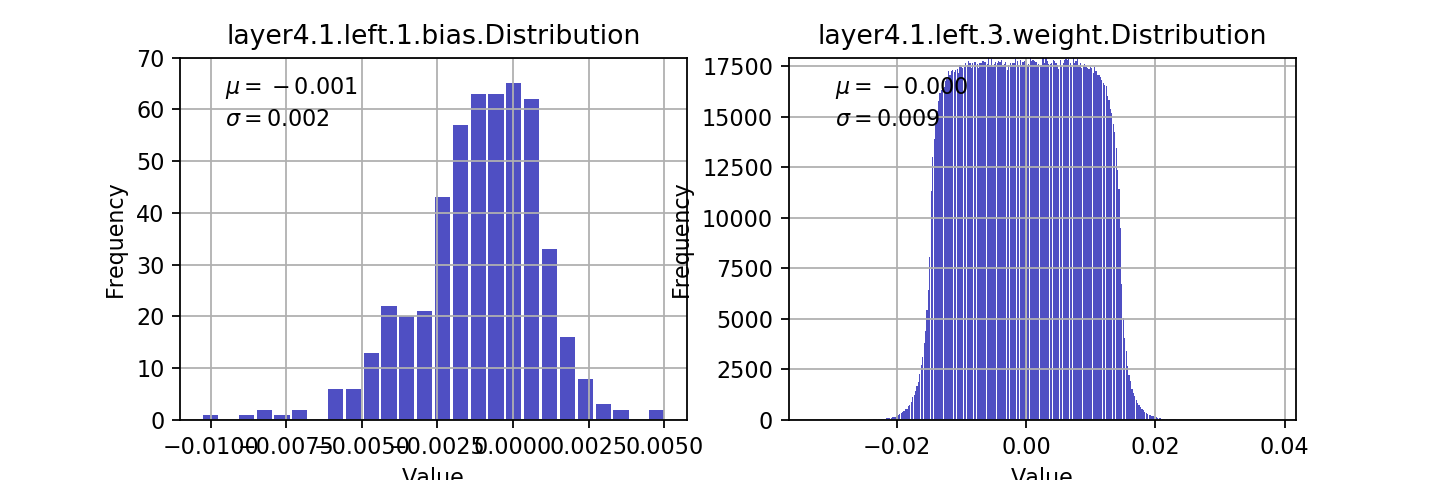

<IPython.core.display.Javascript object>


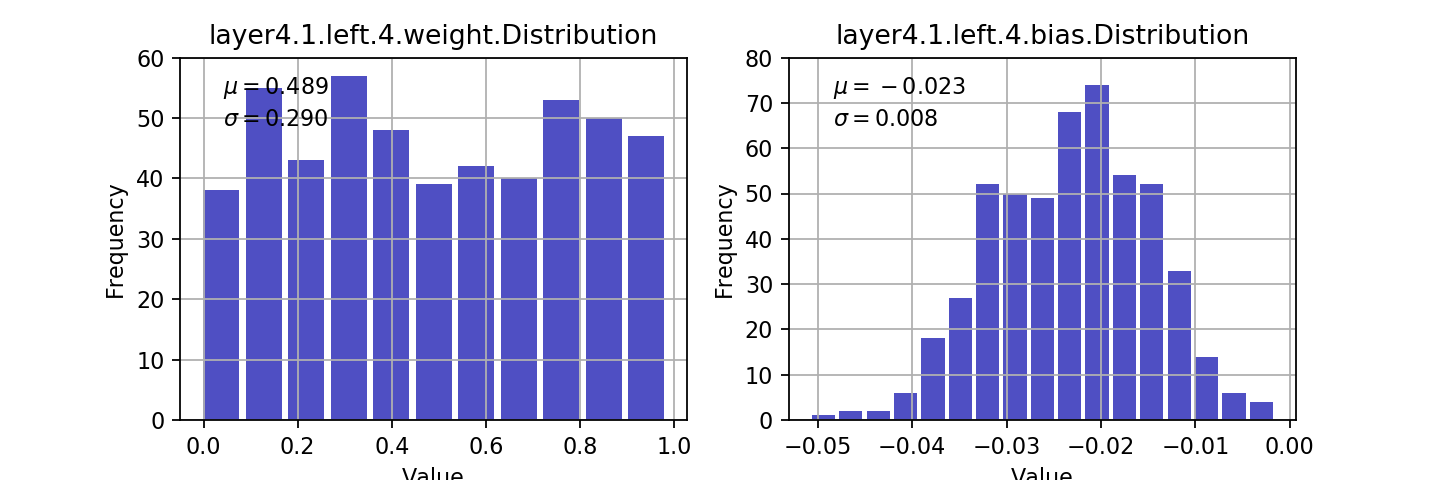

<IPython.core.display.Javascript object>


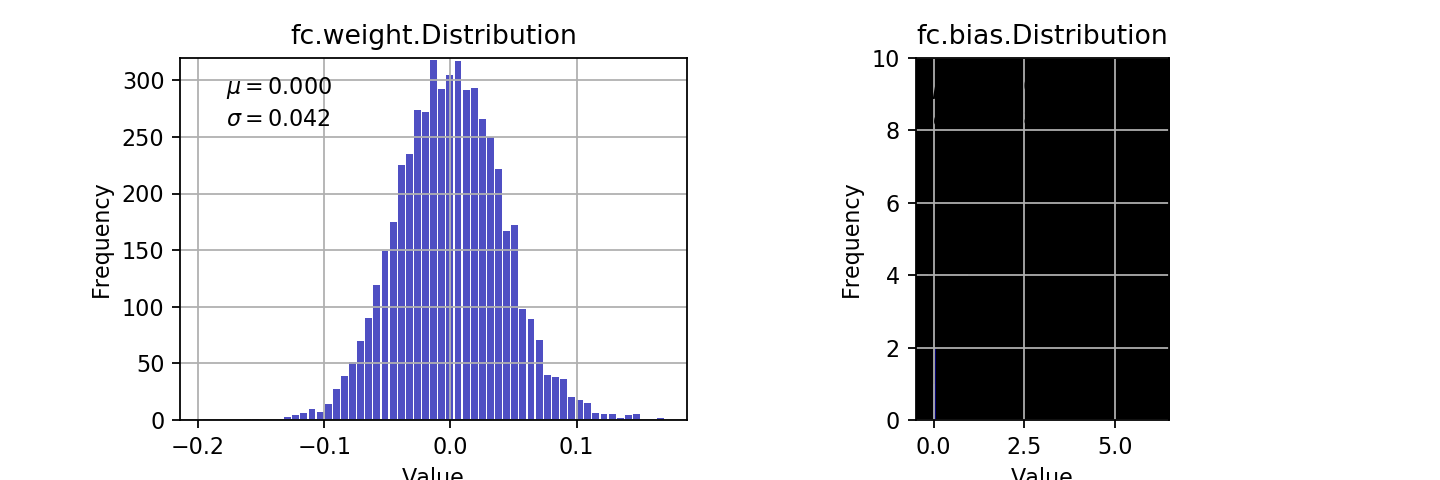

In [79]:
def draw_distribution(ax, data, title='Weights Distribution', xlabel='Value', ylabel='Frequency', bins='auto'):
    
    d = data.numpy().reshape(-1)
    d_mean = np.mean(d, axis=0)
    d_std  = np.std(d, axis=0, ddof=1)

    n, bins, patches = ax.hist(x=d, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    ax.grid()
    
    maxfreq = n.max()
    ymax = np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10
    
    ax.set_ylim(top=ymax)#, bottom=0)
    
    tyaxis = ymax * 0.9
    
    maxvalue = bins.max()
    minvalue = bins.min()
    txaxis = minvalue + (maxvalue - minvalue) * 0.05
    
    ax.text(txaxis, tyaxis, r'$\mu={:6.3f}$'.format(d_mean))
    ax.text(txaxis, tyaxis*0.9, r'$\sigma={:6.3f}$'.format(d_std))
    
            
def show_distribution(model):
    params=model.state_dict()
    even = True
    plt.subplots_adjust(wspace =1, hspace =1)
    
    for k,v in params.items():
        
        if k.split('.')[-1] == 'weight' or k.split('.')[-1] == 'bias':
            
            if even:
                fig, (ax1, ax2) = plt.subplots(1,2,figsize=(9,3), dpi=80)
                ax = ax1            
            else:
                ax = ax2

            title = k + '.Distribution'
            draw_distribution(ax, v.data.cpu(), title)
            even = not even

show_distribution(net)      //呼叫剛剛訓練玩的model

In [80]:
class FeatureExtractor(nn.Module):
    def __init__(self, submodule):
        super(FeatureExtractor,self).__init__()
        self.submodule = submodule
    def forward(self, x):
        outputs = []
        for name, module in self.submodule._modules.items():
            if name is "fc": x = x.view(x.size(0), -1)
            if(name[0:6] != 'Linear'):
                x = module(x)
                outputs.append(x)
        return outputs

In [81]:
myexactor = FeatureExtractor(cnn)

In [86]:
x = myexactor(test_x)

In [91]:
for j in range(len(x)):
    for i in range(10):
        matplotlib.image.imsave(str(10*j+i+1)+'.jpg', x[j].data.numpy()[0,i,:,:],cmap='gray')

In [40]:
# To load CIFAR10 training and test dataset from local data to memory
datadir = './data' # in my laptop
#datadir = '/tmp/dataset-nctu' # for NCHC environment
trainset = torchvision.datasets.CIFAR10(root=datadir, train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root=datadir, train=False, download=True, transform=transform_test)
TRAIN_SIZE = len(trainset)
TEST_SIZE = len(testset)

#BATCH_SIZE = 256
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)


test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:700]/255.



Files already downloaded and verified
Files already downloaded and verified


In [17]:
# define CNN model architecture
class Net(nn.Module):

    #define the layers
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.relu = nn.ReLU()
        
    #concatenate these layers
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [18]:
# define Resnet-18 model architecture
class ResidualBlock(nn.Module):
    
    def __init__(self, inchannel, outchannel, stride=1):
        super(ResidualBlock, self).__init__()
        self.left = nn.Sequential(
            nn.Conv2d(inchannel, outchannel, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(outchannel),
            nn.ReLU(inplace=True),
            nn.Conv2d(outchannel, outchannel, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(outchannel)
        )
        self.shortcut = nn.Sequential()
        if stride != 1 or inchannel != outchannel:
            self.shortcut = nn.Sequential(
                nn.Conv2d(inchannel, outchannel, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(outchannel)
            )

    def forward(self, x):
        out = self.left(x)
        out += self.shortcut(x)
        out = F.relu(out)
        return out

    
class ResNet(nn.Module):
    
    def __init__(self, ResidualBlock, num_classes=10):
        super(ResNet, self).__init__()
        self.inchannel = 64
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
        )
        self.layer1 = self.make_layer(ResidualBlock, 64,  2, stride=1)
        self.layer2 = self.make_layer(ResidualBlock, 128, 2, stride=2)
        self.layer3 = self.make_layer(ResidualBlock, 256, 2, stride=2)
        self.layer4 = self.make_layer(ResidualBlock, 512, 2, stride=2)
        self.fc = nn.Linear(512, num_classes)

    def make_layer(self, block, channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)   #strides=[1,1]
        layers = []
        for stride in strides:
            layers.append(block(self.inchannel, channels, stride))
            self.inchannel = channels
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv1(x)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out


def ResNet18():

    return ResNet(ResidualBlock)

In [19]:
# declare a NN model
if MODEL_NAME == 'SIMPLE':
    net = Net().to(device)
else:
    net = ResNet18().to(device)

In [20]:
# define loss function and optimization method
#LR = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=LR, momentum=0.9)

def adjust_learning_rate(optimizer, epoch):
    # Sets the learning rate to the initial LR decayed by 10 every 30 epochs
    lr = LR * (0.1 ** (epoch // 30))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    print('Learning rate is {:.5f}'.format(lr))

In [21]:
#Set the model in training mode
net.train()

#EPOCH = 10
accuvalue = []
lossvalue = []
   
for epoch in range(EPOCH):  # loop over the dataset multiple times
    adjust_learning_rate(optimizer, epoch)
    running_loss = 0.0
    lossv = 0.0
    correct = 0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        
        #change the type into cuda tensor 
        inputs = inputs.to(device) 
        labels = labels.to(device) 

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        # select the class with highest probability
        _, pred = outputs.max(1)
        # if the model predicts the same results as the true
        # label, then the correct counter will plus 1
        correct += pred.eq(labels).sum().item()
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        lossv += loss.item()
        if i % SUBEPOCH == SUBEPOCH-1:    # print every SUBEPOCH mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / SUBEPOCH))
            running_loss = 0.0
            
            
    accuv = 100.*correct/len(trainset)
    lossvalue.append(lossv / TRAIN_SIZE * BATCH_SIZE)
    accuvalue.append(accuv)
    
    print('%d epoch, training accuracy: %.3f' % (epoch+1, accuv))
print('Finished Training')

Learning rate is 0.10000
[1,    25] loss: 2.060
[1,    50] loss: 1.718
[1,    75] loss: 1.566
1 epoch, training accuracy: 36.282
Finished Training


<IPython.core.display.Javascript object>


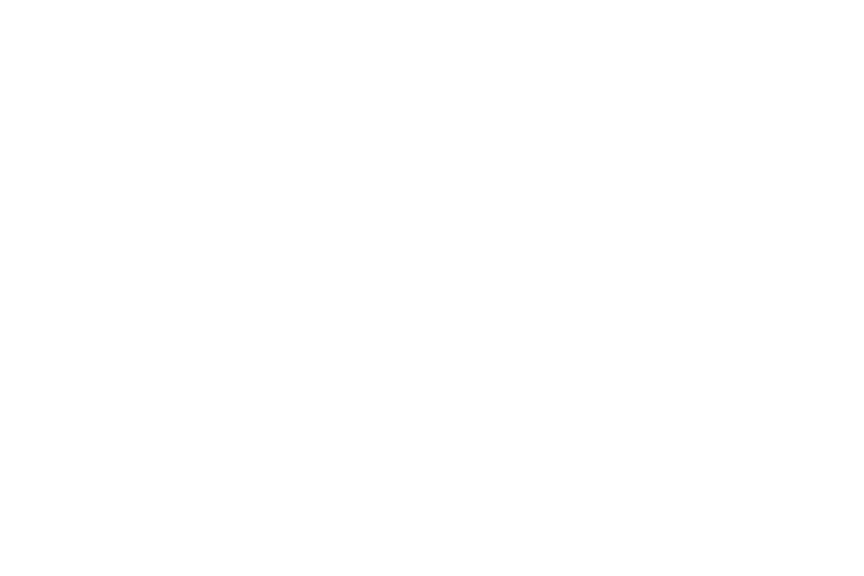

<IPython.core.display.Javascript object>


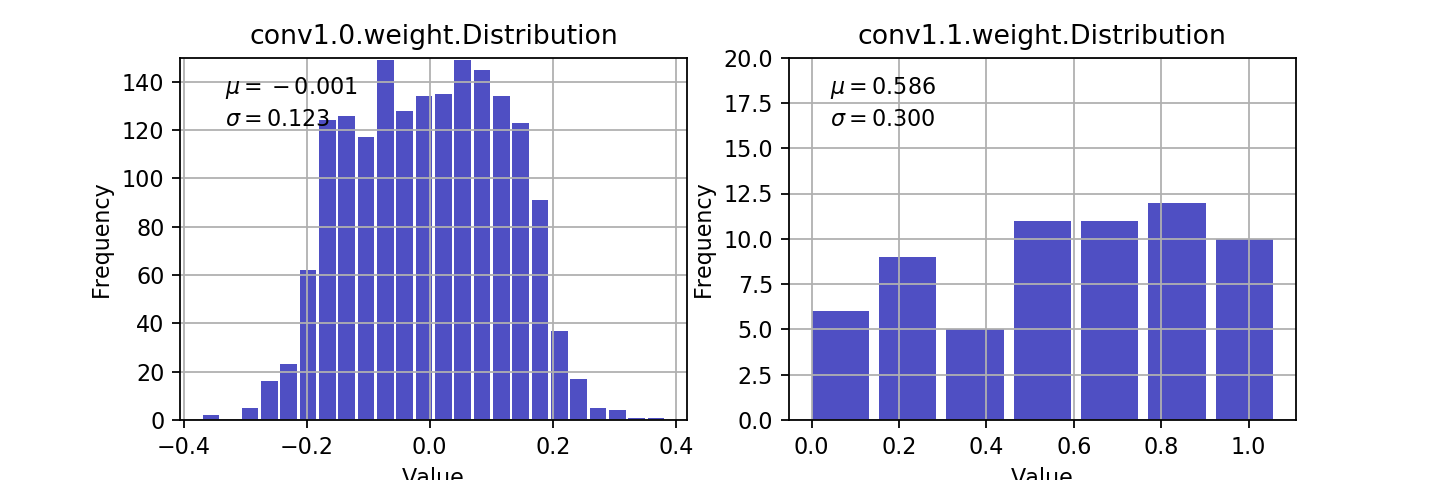

<IPython.core.display.Javascript object>


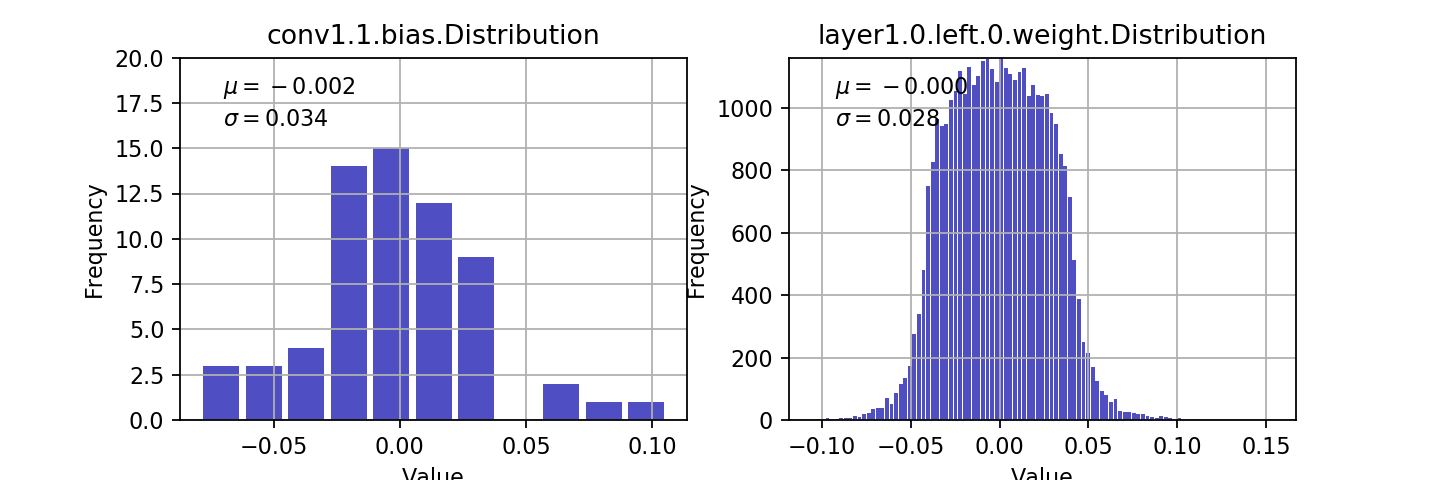

<IPython.core.display.Javascript object>


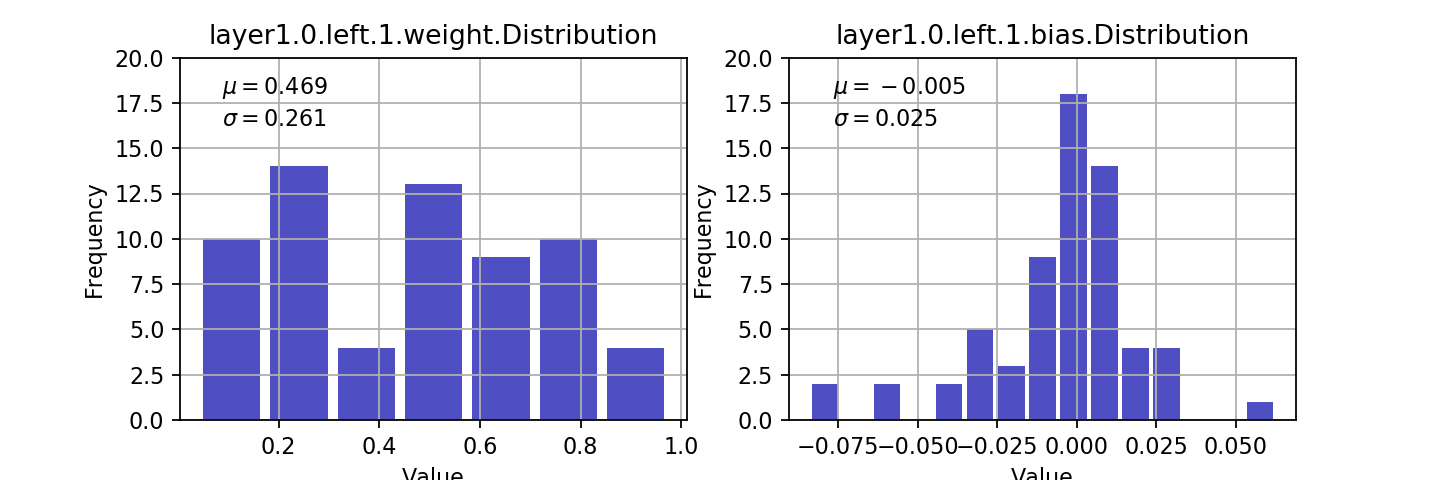

<IPython.core.display.Javascript object>


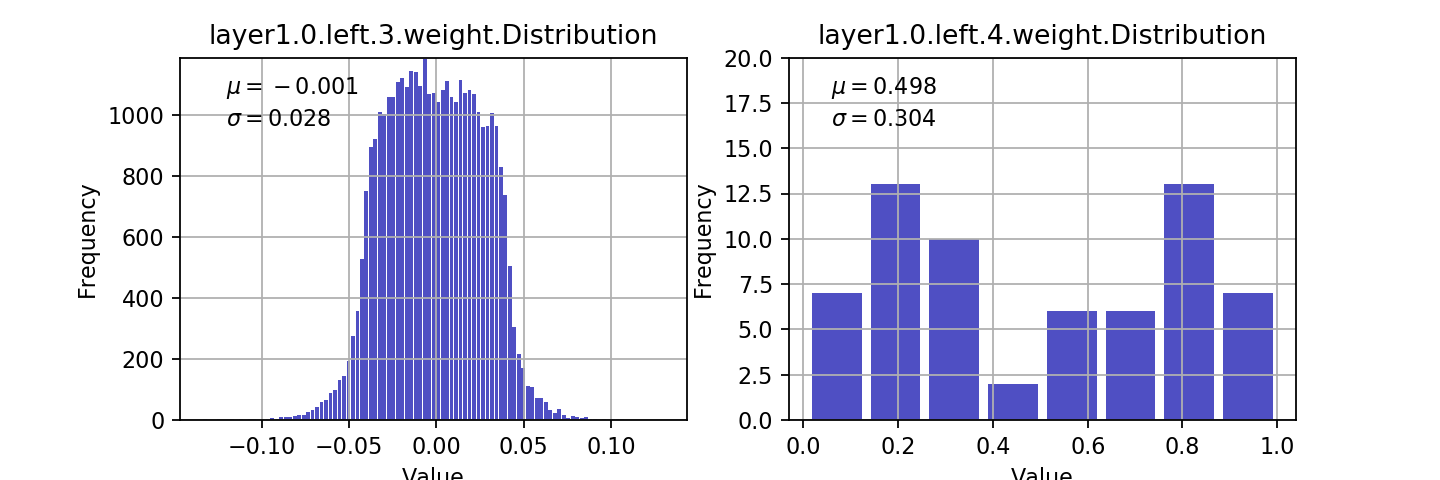

<IPython.core.display.Javascript object>


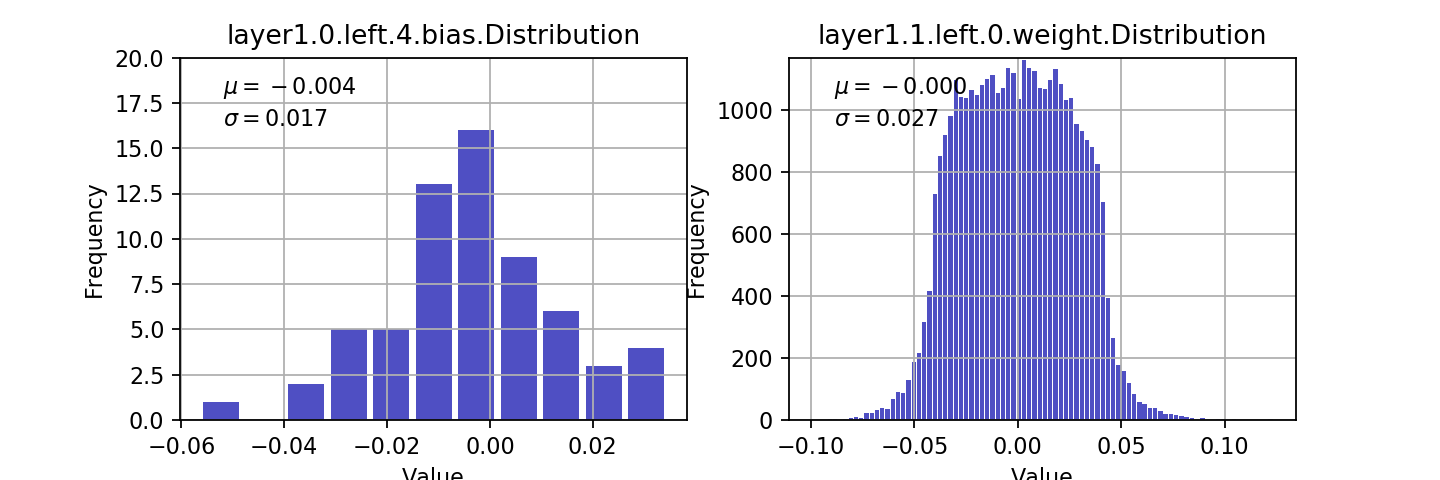

<IPython.core.display.Javascript object>


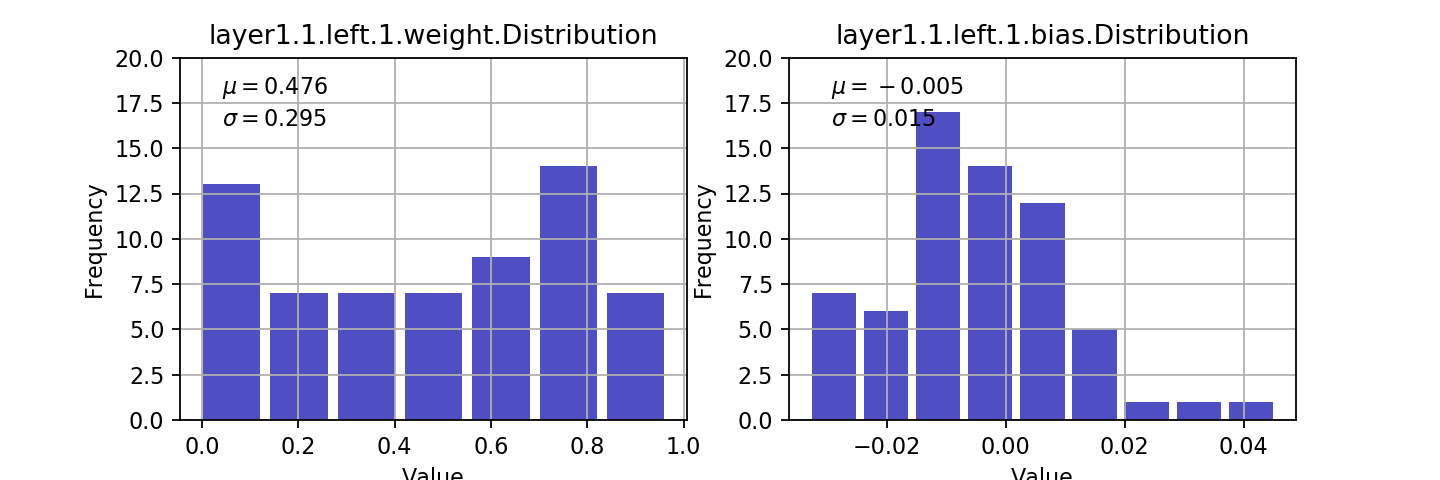

<IPython.core.display.Javascript object>


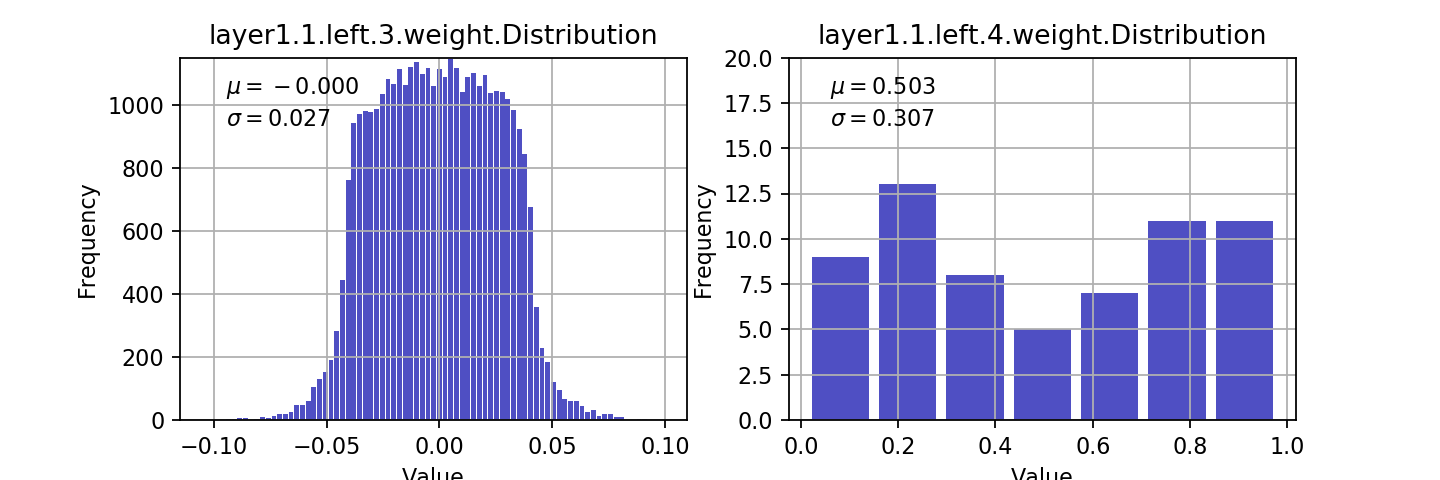

<IPython.core.display.Javascript object>


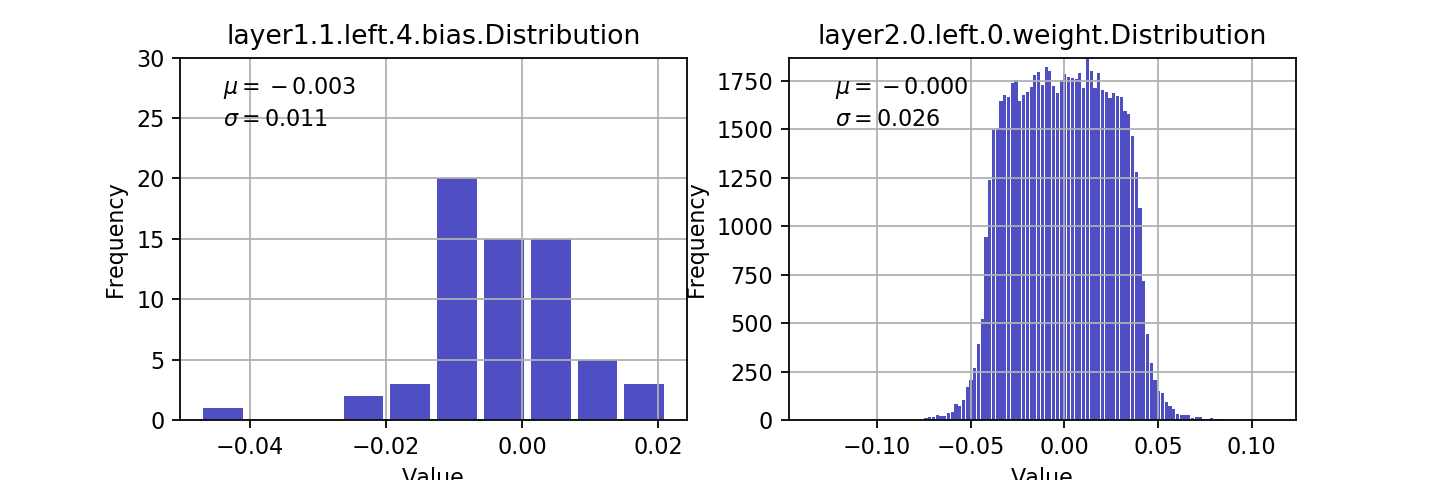

<IPython.core.display.Javascript object>


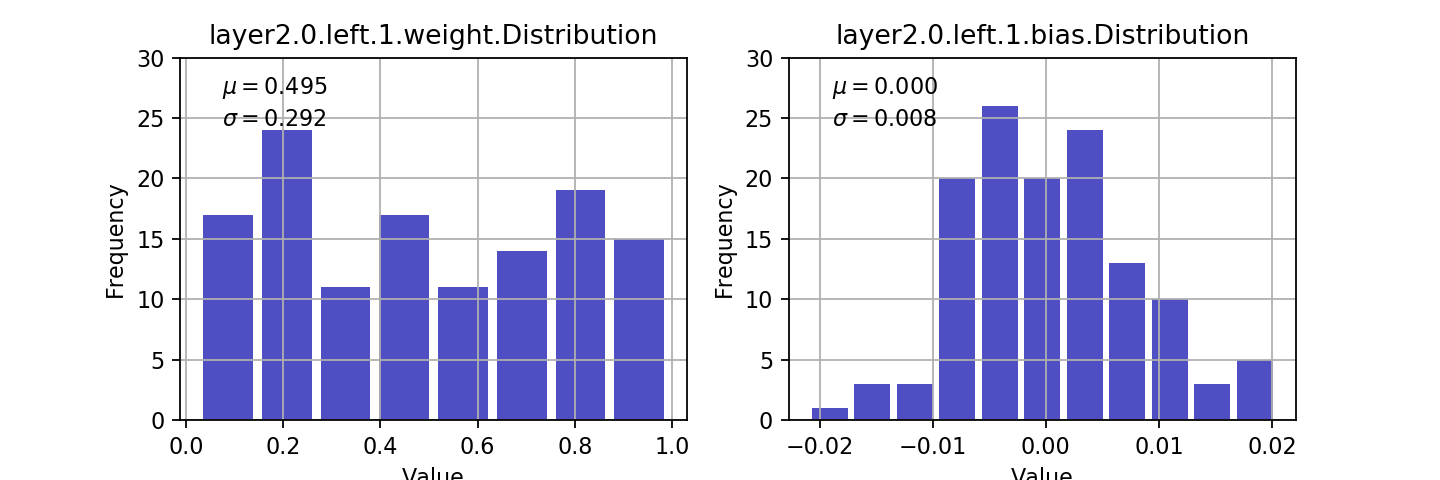

<IPython.core.display.Javascript object>


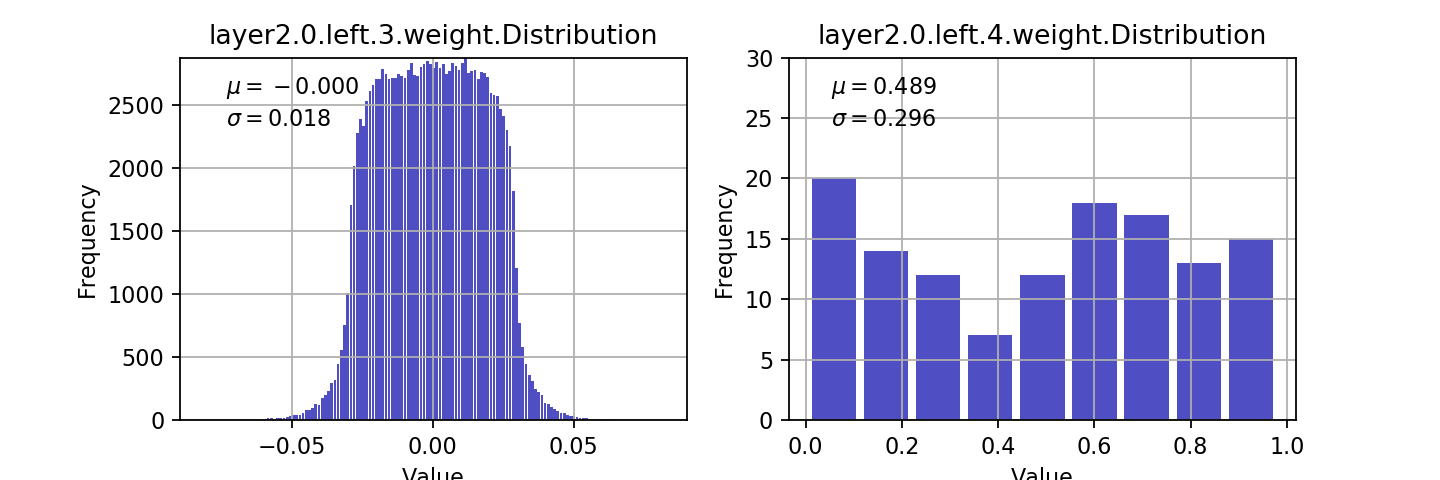

<IPython.core.display.Javascript object>


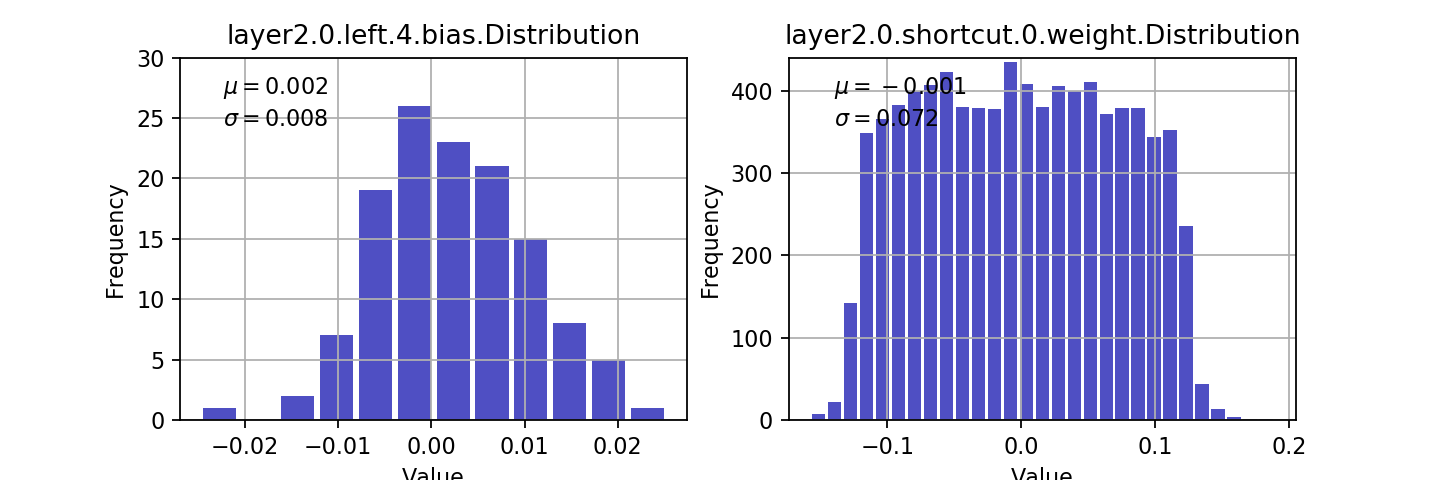

<IPython.core.display.Javascript object>


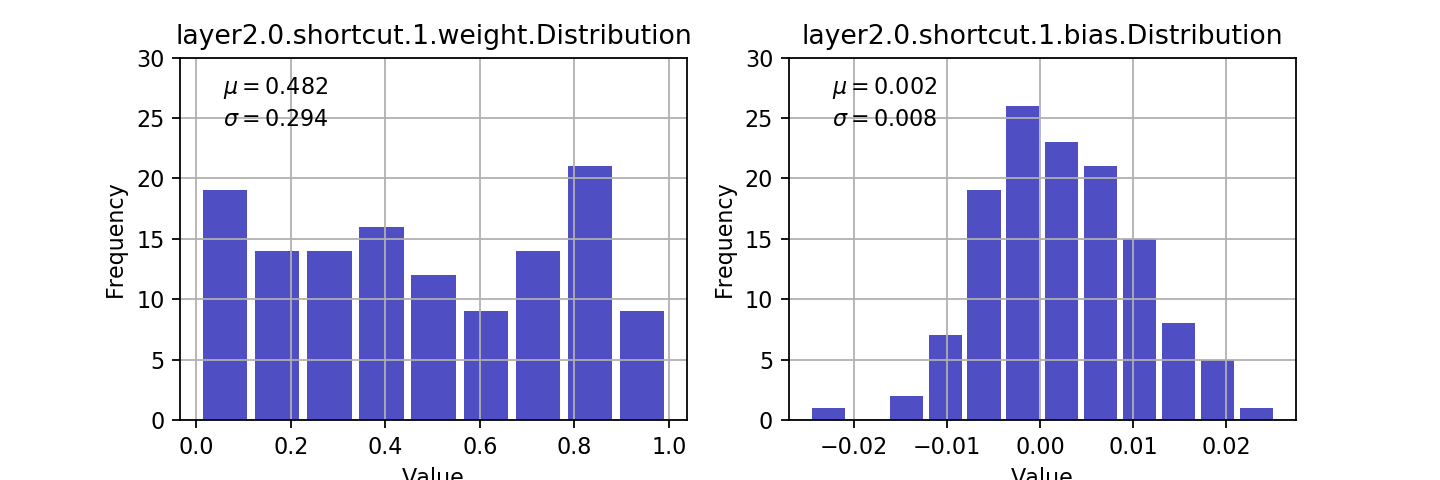

<IPython.core.display.Javascript object>


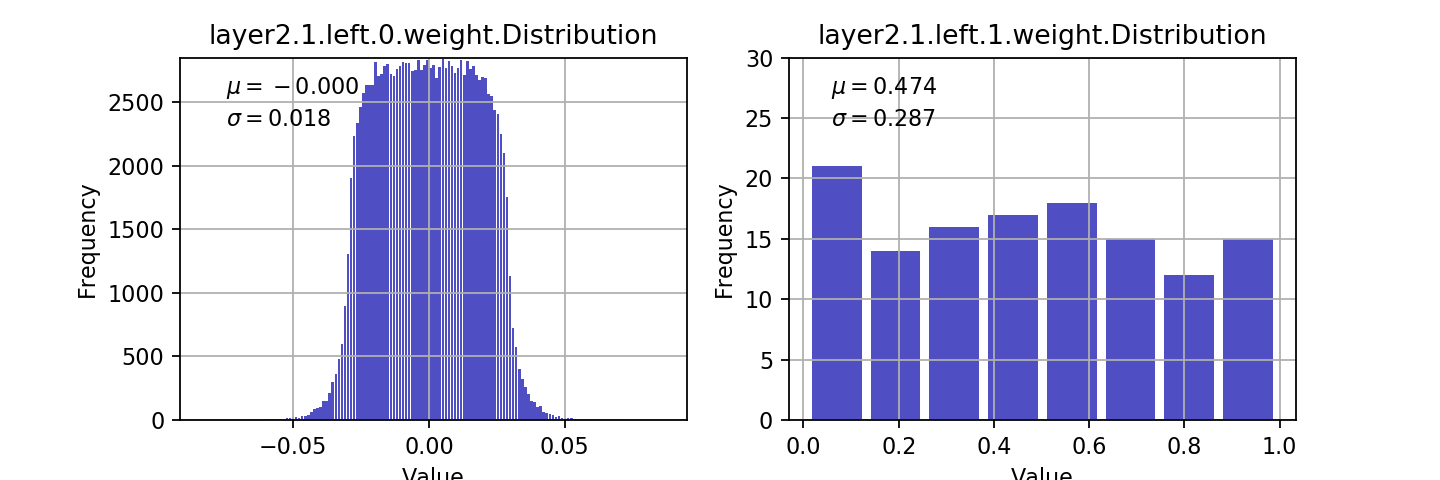

<IPython.core.display.Javascript object>


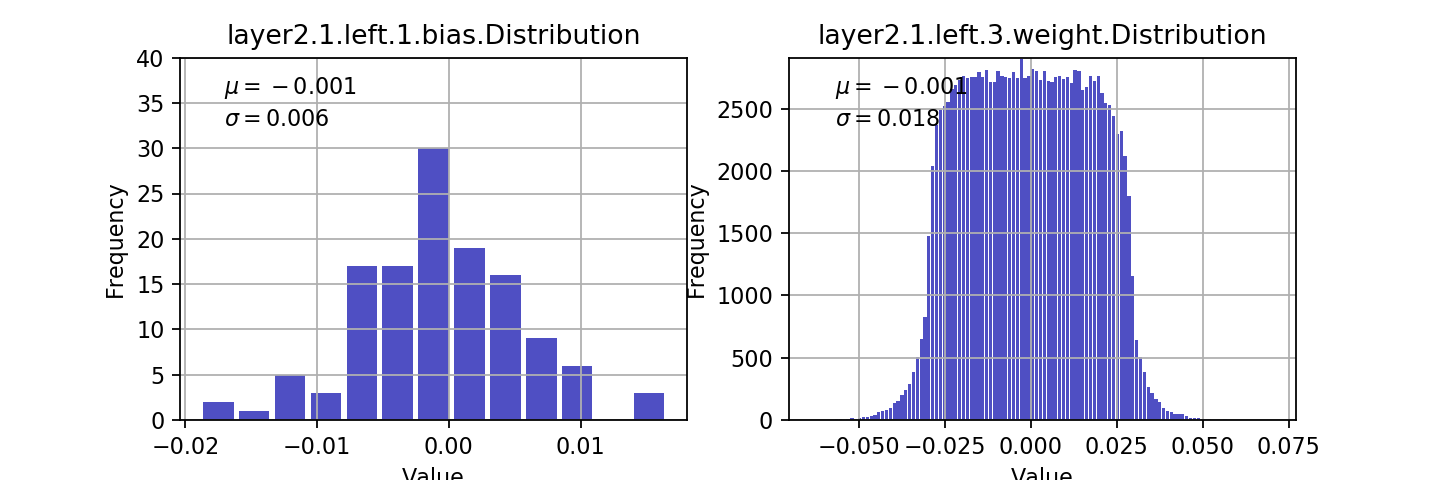

<IPython.core.display.Javascript object>


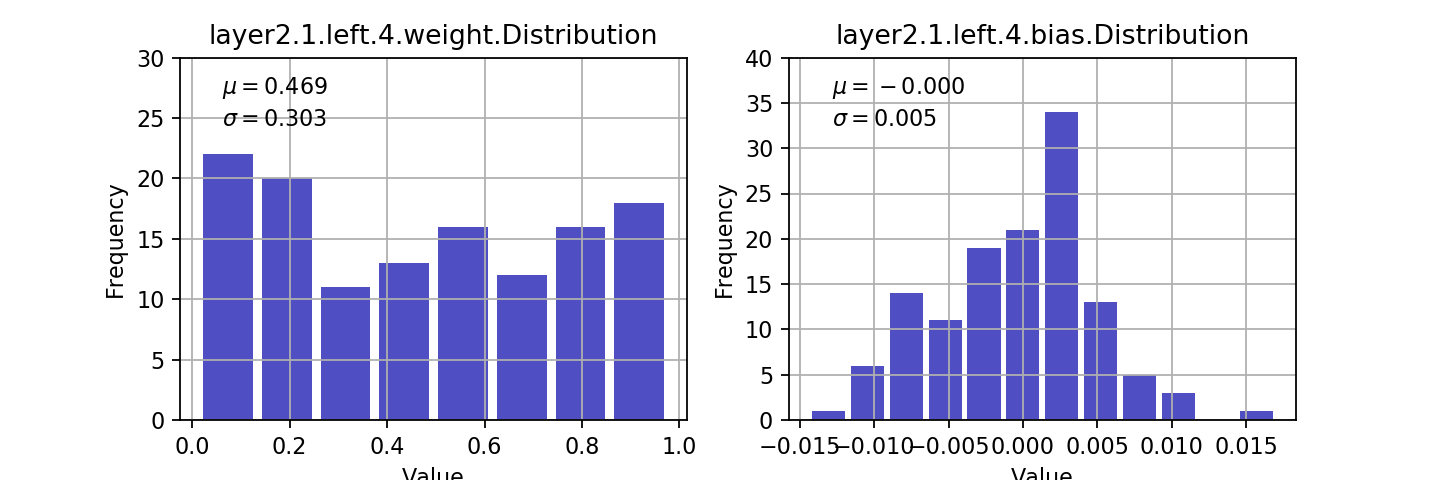

<IPython.core.display.Javascript object>


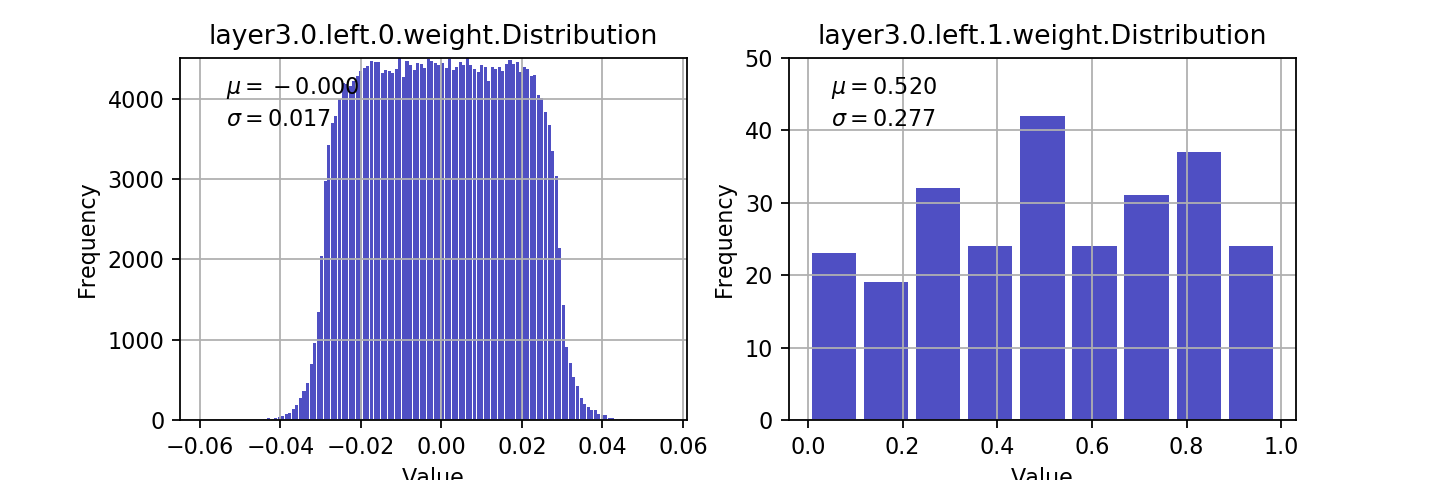

<IPython.core.display.Javascript object>


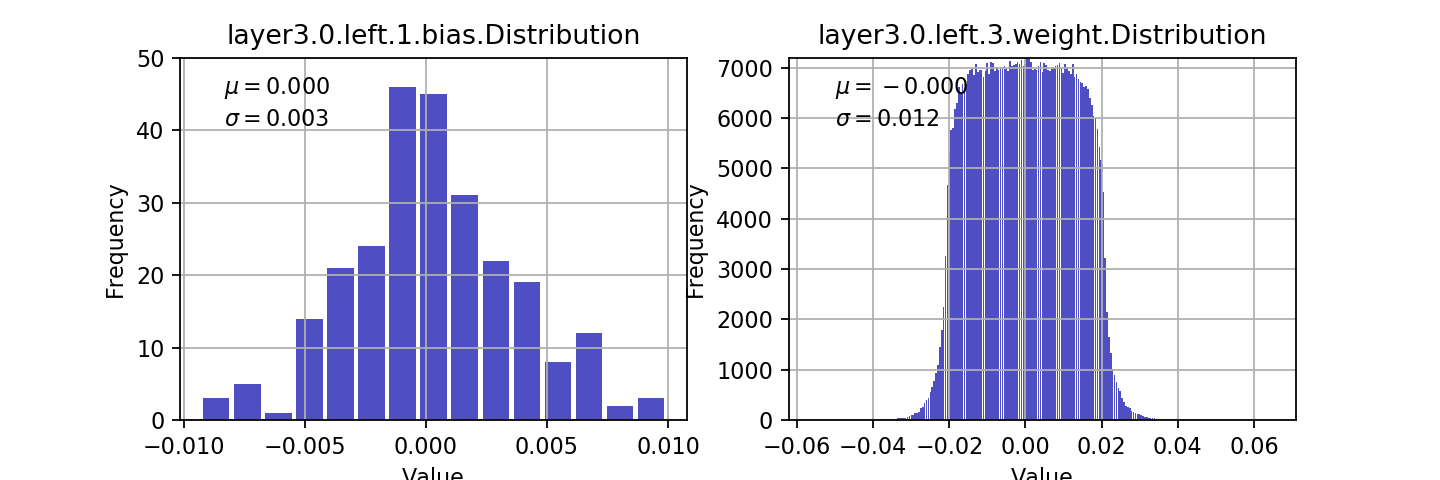

<IPython.core.display.Javascript object>


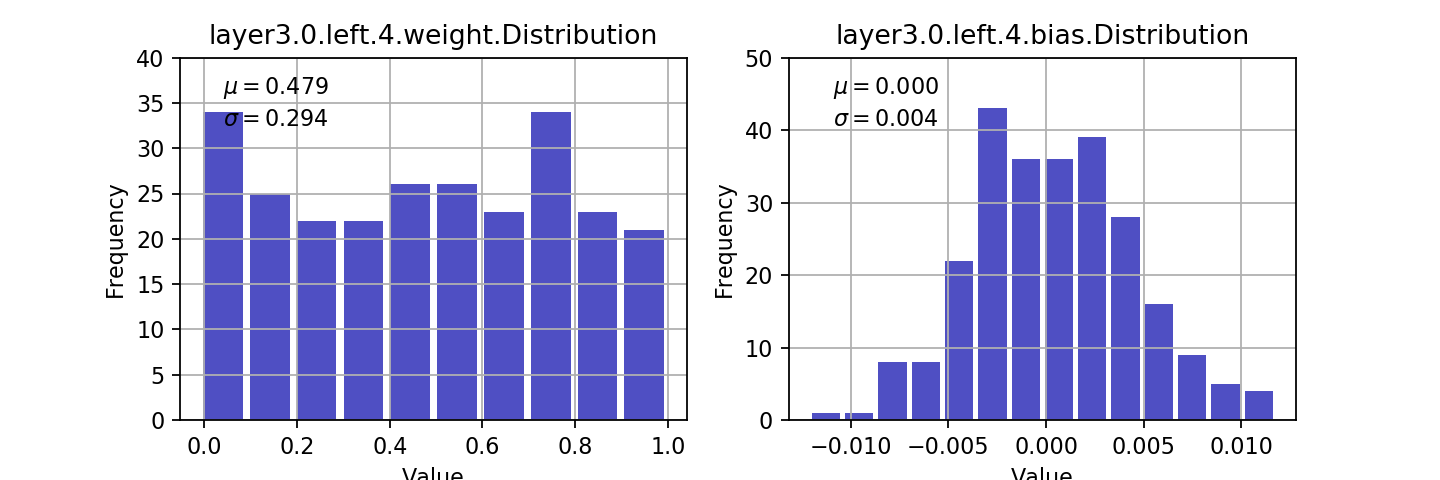

<IPython.core.display.Javascript object>


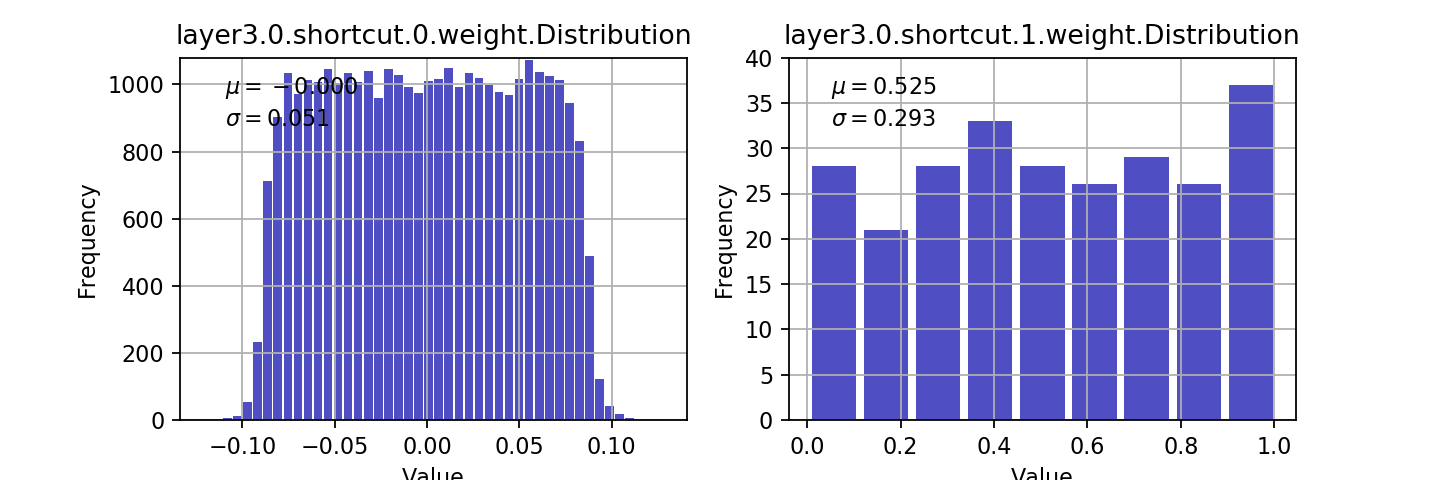

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


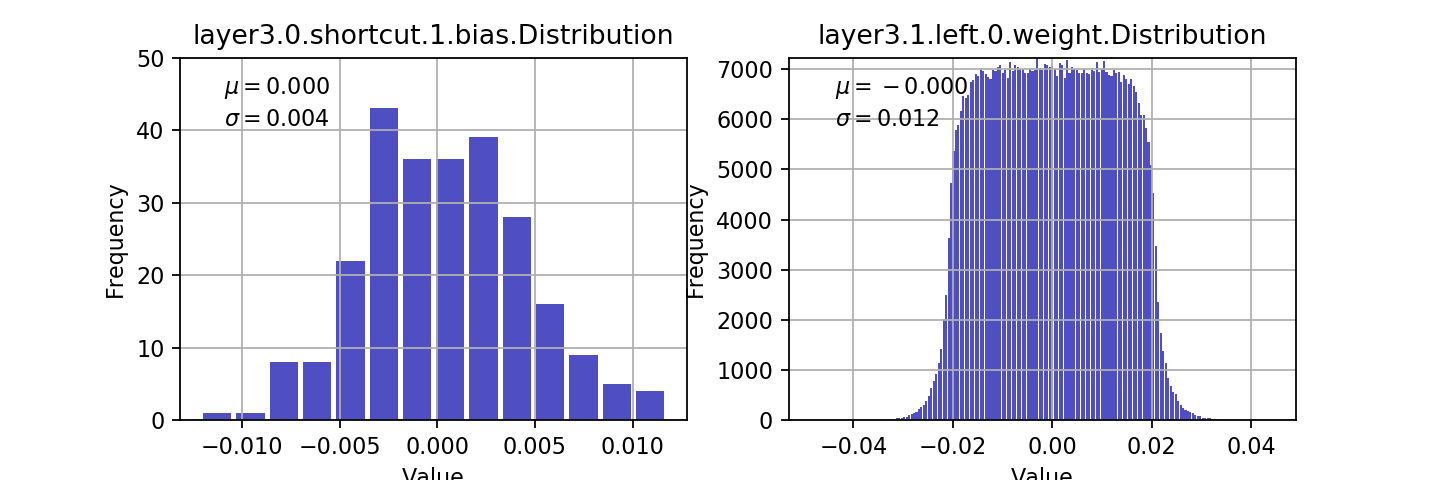

<IPython.core.display.Javascript object>


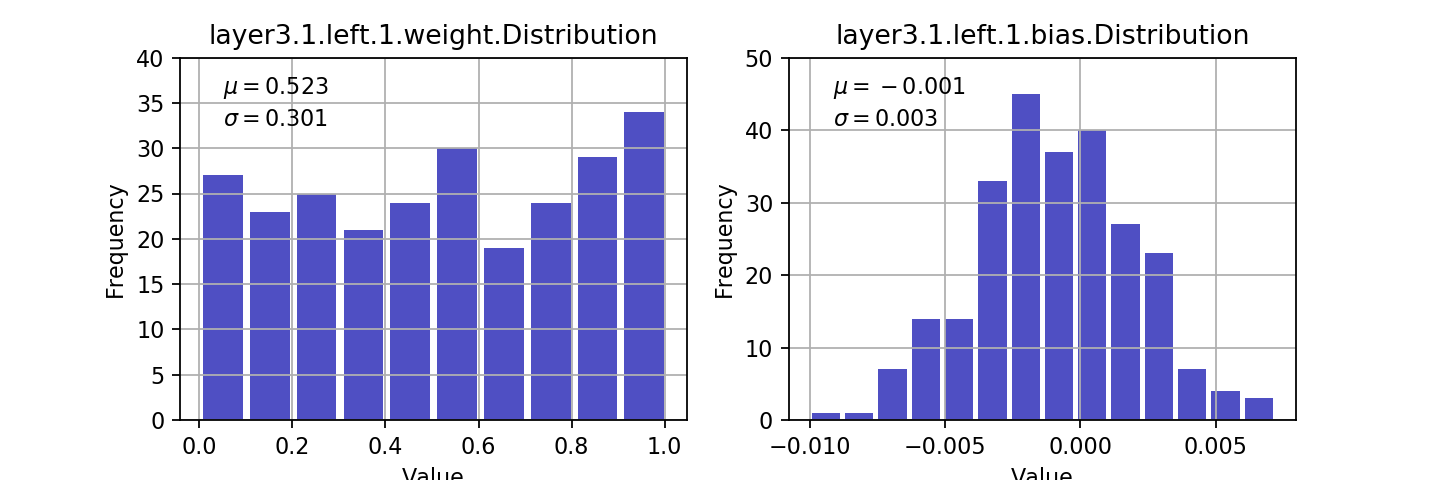

<IPython.core.display.Javascript object>


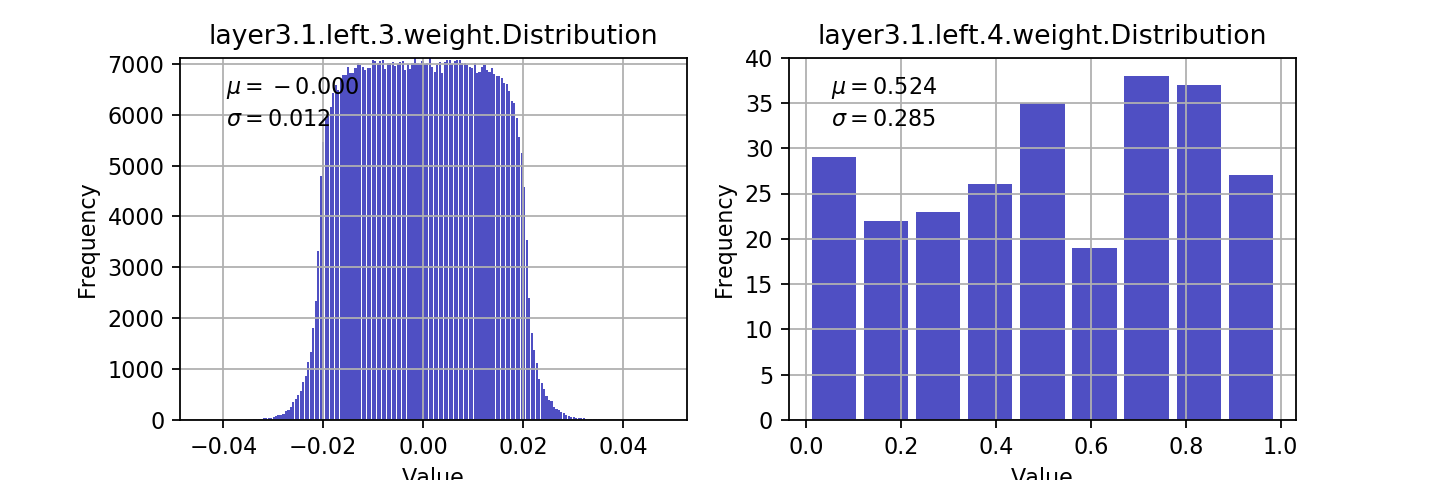

<IPython.core.display.Javascript object>


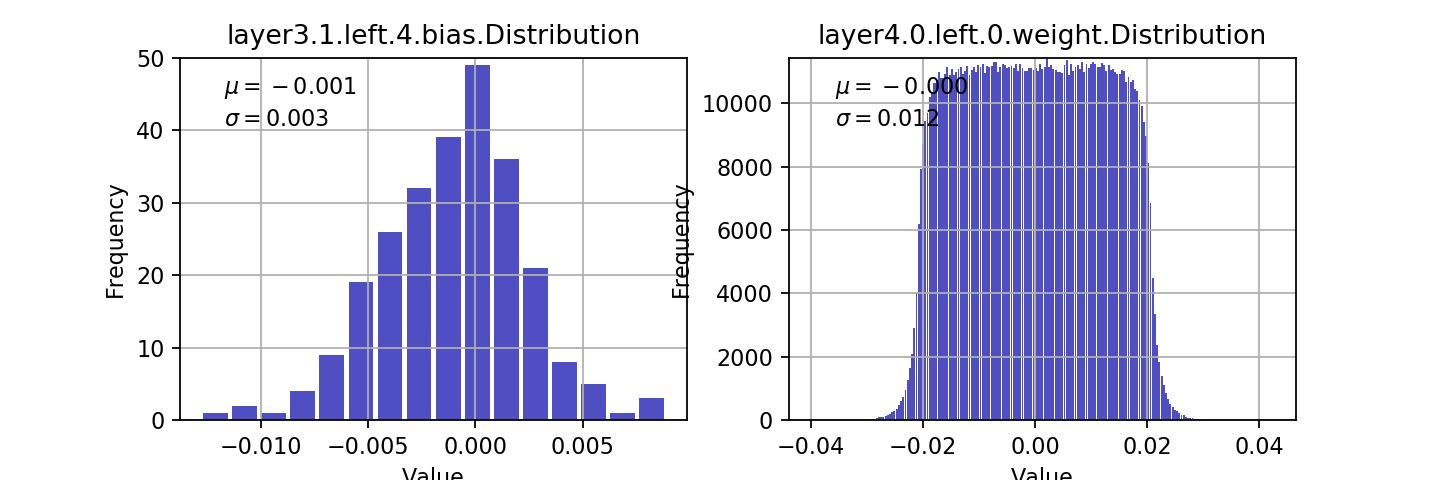

<IPython.core.display.Javascript object>


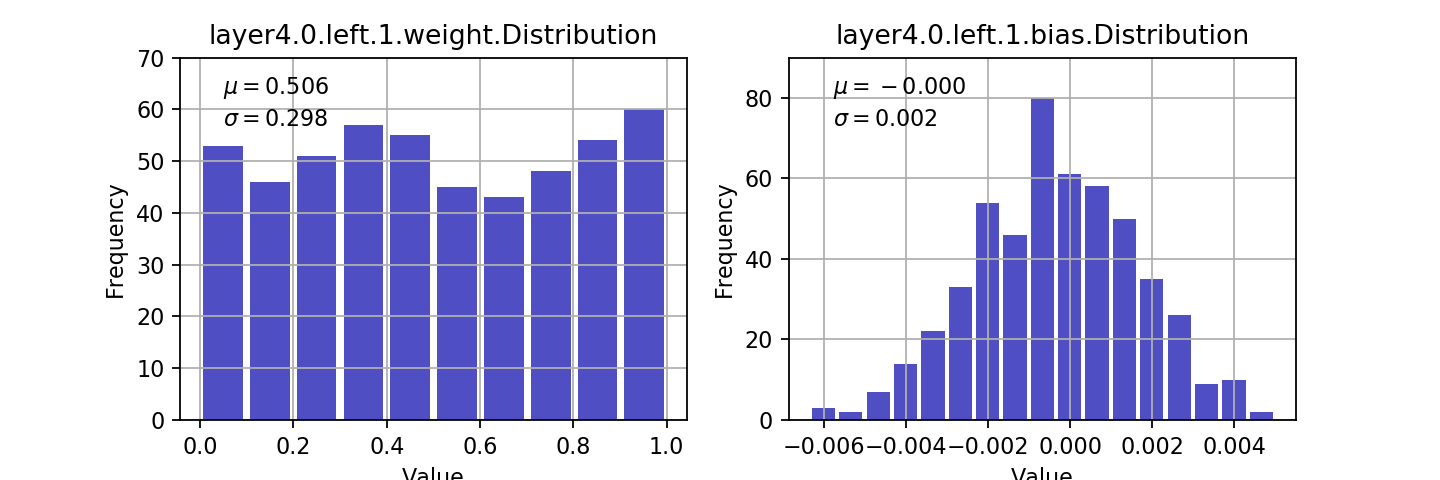

<IPython.core.display.Javascript object>


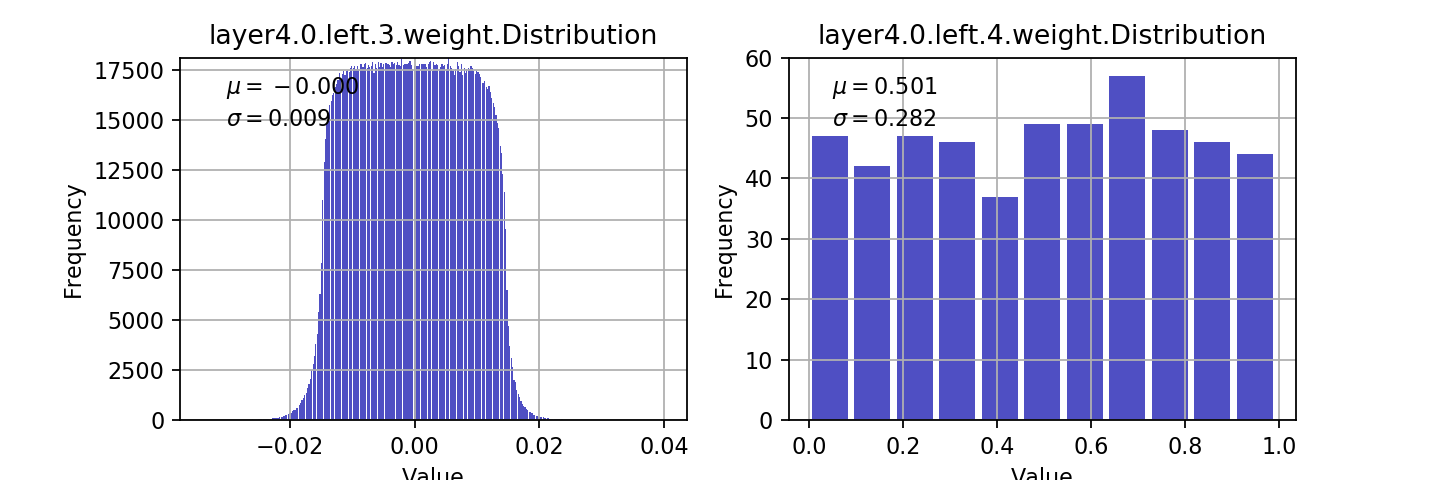

<IPython.core.display.Javascript object>


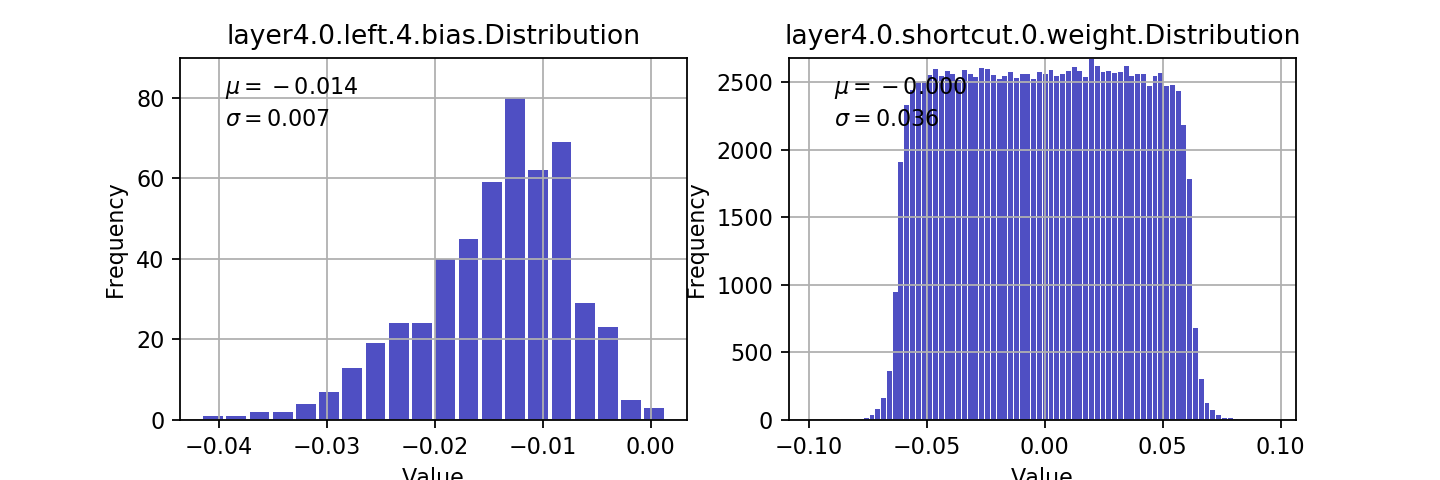

<IPython.core.display.Javascript object>


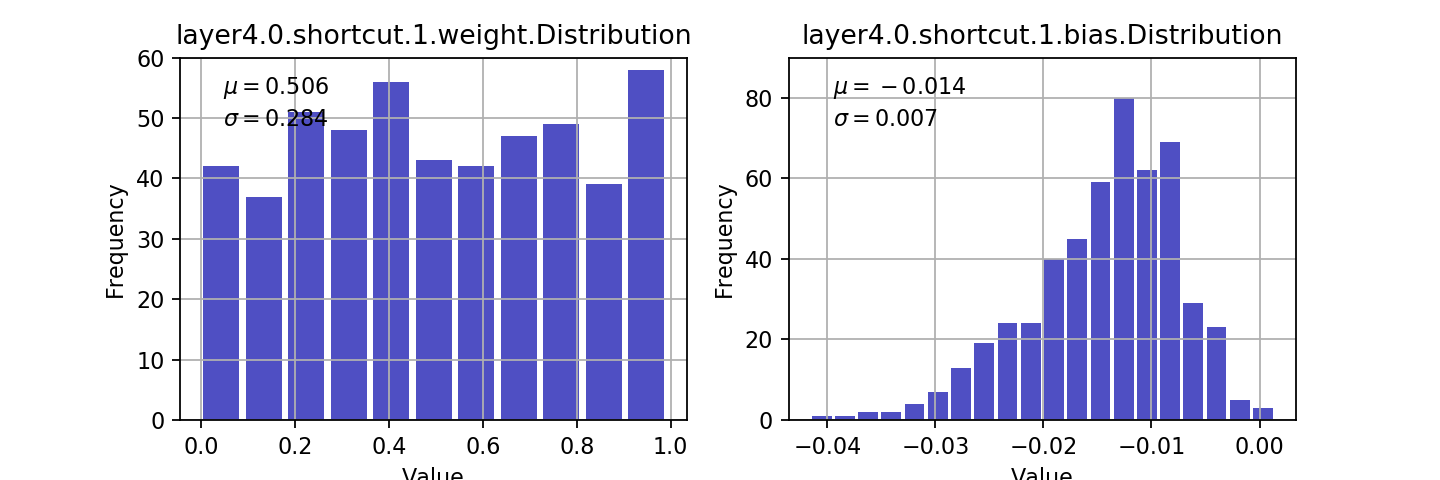

<IPython.core.display.Javascript object>


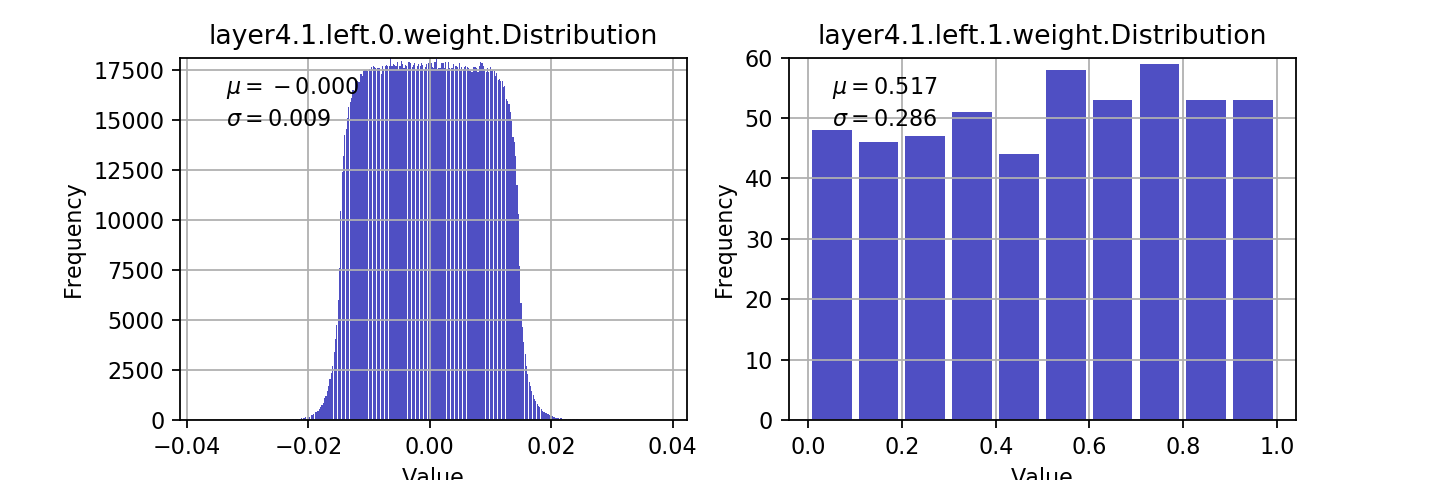

<IPython.core.display.Javascript object>


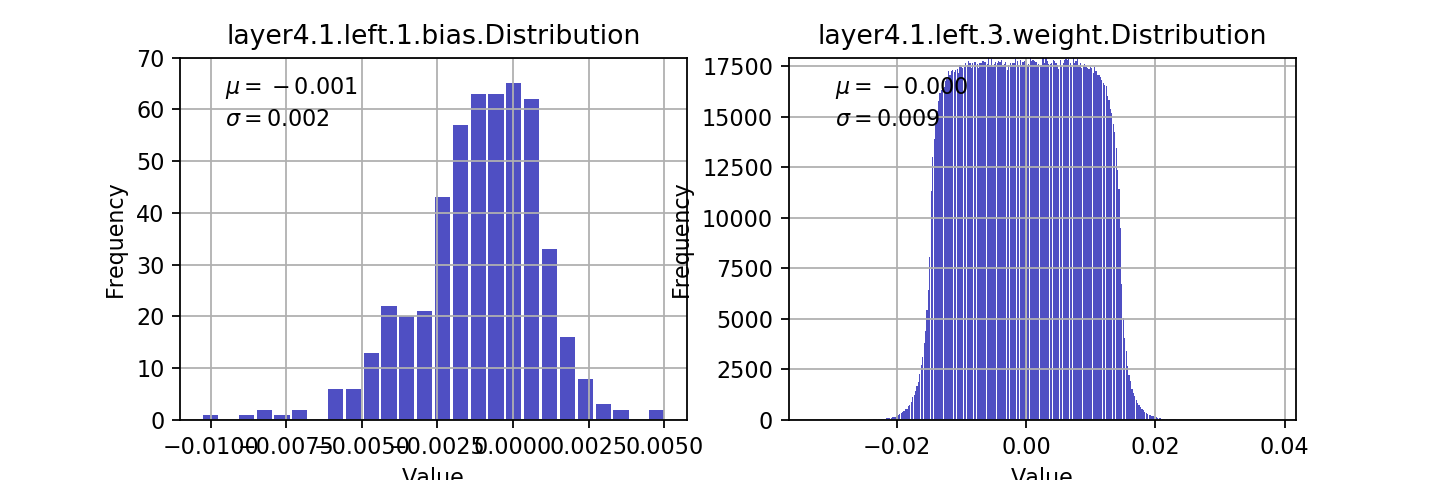

<IPython.core.display.Javascript object>


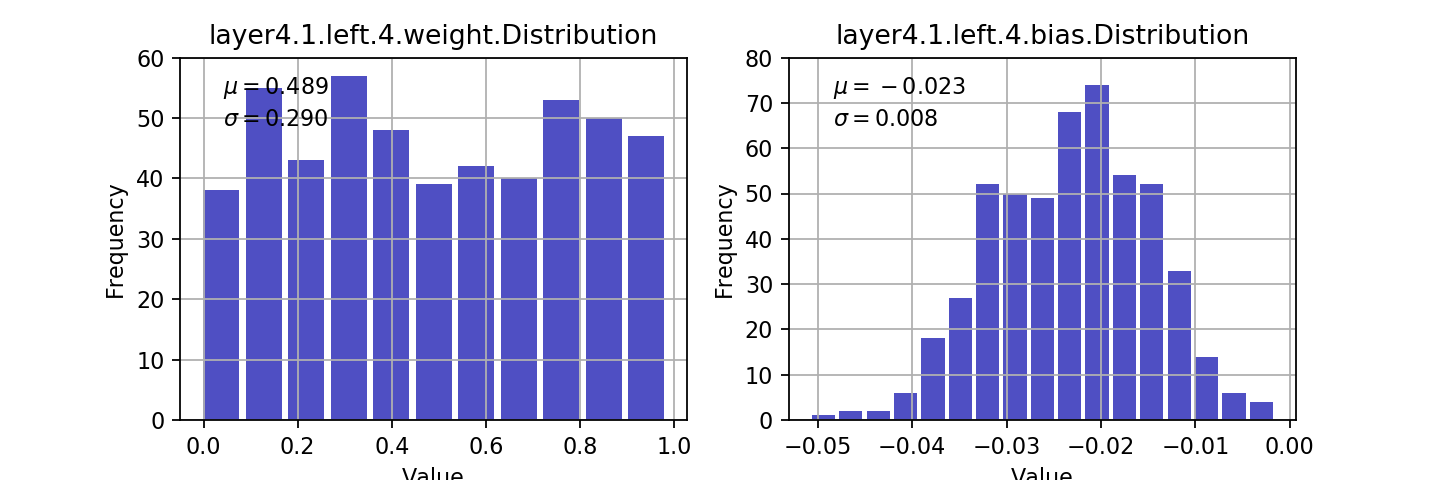

<IPython.core.display.Javascript object>


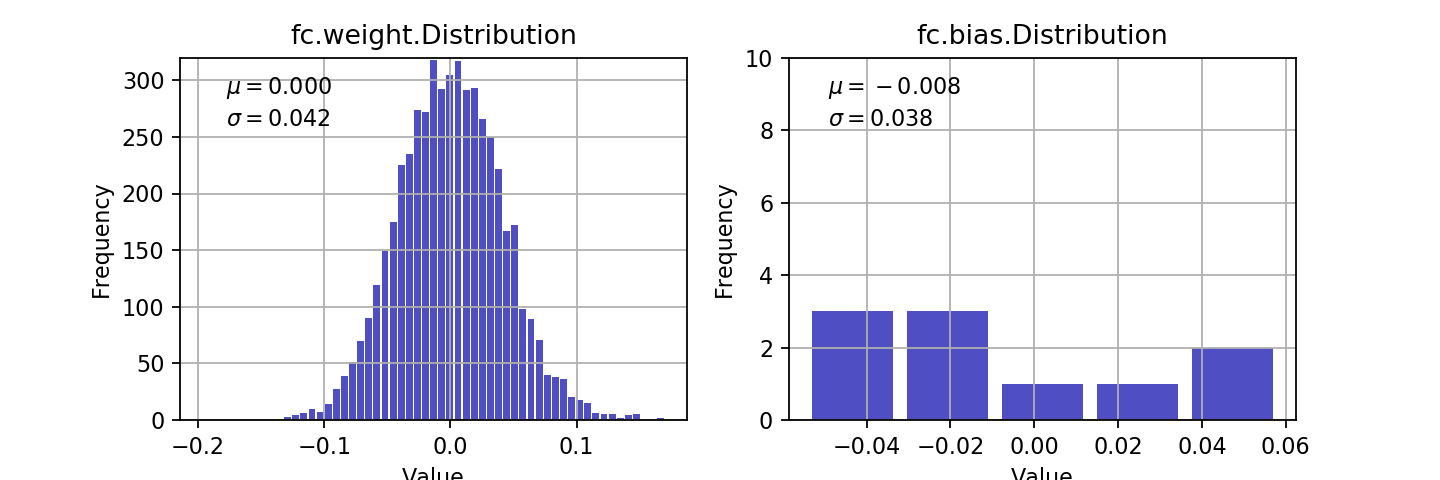

In [22]:
# Plot Weight & Bias distribution
def draw_distribution(ax, data, title='Weights Distribution', xlabel='Value', ylabel='Frequency', bins='auto'):
    
    d = data.numpy().reshape(-1)
    d_mean = np.mean(d, axis=0)
    d_std  = np.std(d, axis=0, ddof=1)

    n, bins, patches = ax.hist(x=d, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    ax.grid()
    
    maxfreq = n.max()
    ymax = np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10
    
    ax.set_ylim(top=ymax)#, bottom=0)
    
    tyaxis = ymax * 0.9
    
    maxvalue = bins.max()
    minvalue = bins.min()
    txaxis = minvalue + (maxvalue - minvalue) * 0.05
    
    ax.text(txaxis, tyaxis, r'$\mu={:6.3f}$'.format(d_mean))
    ax.text(txaxis, tyaxis*0.9, r'$\sigma={:6.3f}$'.format(d_std))
    
            
def show_distribution(model):
    params=model.state_dict()
    even = True
    plt.subplots_adjust(wspace =1, hspace =1)
    
    for k,v in params.items():
        
        if k.split('.')[-1] == 'weight' or k.split('.')[-1] == 'bias':
            
            if even:
                fig, (ax1, ax2) = plt.subplots(1,2,figsize=(9,3), dpi=80)
                ax = ax1            
            else:
                ax = ax2

            title = k + '.Distribution'
            draw_distribution(ax, v.data.cpu(), title)
            even = not even
            

show_distribution(net)   

In [26]:
class FeatureExtractor(nn.Module):
	def __init__(self, submodule):
		super(FeatureExtractor,self).__init__()
		self.submodule = submodule
	def forward(self, x):
		outputs = []
		for name, module in self.submodule._modules.items():
			if name is "fc": x = x.view(x.size(0), -1)
			if(name[0:6] != 'Linear'):
				x = module(x)
				outputs.append(x)
		return outputs

myexactor=FeatureExtractor(net)
x=myexactor(test_x)


for j in range(len(x)):
	for i in range(10):
		matplotlib.image.show(x[j].data.numpy()[0,i,:,:],cmap='gray')


NameError: name 'test_x' is not defined

In [13]:
#Save the model

if SAVE_ALL: #save entire model
    if MODEL_NAME == 'SIMPLE':
        torch.save(net, './cifar10_model.pt')
    else:
        torch.save(net, './cifar10_model_res18.pt')

else: #only save model parameters
    state = {
        'net': net.state_dict(),
        'acc': 100.*correct/len(trainset),
        'epoch': EPOCH
    }
    if MODEL_NAME == 'SIMPLE':
        torch.save(net, './cifar10_checkpoint.t7')
    else:
        torch.save(net, './cifar10_checkpoint_res18.t7')

print('Finished Saving')

Finished Saving


/opt/conda/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type ResNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/opt/conda/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type ResidualBlock. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [14]:
# Reload the saved model

if SAVE_ALL: #save entire model
    if MODEL_NAME == 'SIMPLE':
        net = torch.load('./cifar10_model.pt')
    else:
        net = torch.load('./cifar10_model_res18.pt')

else: #only save model parameters
    if MODEL_NAME == 'SIMPLE':
        net = Net()
        checkpoint = torch.load('./cifar10_checkpoint.t7')
    else:
        net = ResNet18()
        checkpoint = torch.load('./cifar10_checkpoint_res18.t7')
        
    net.load_state_dict(checkpoint['net'])

print('Finished Loading')

Finished Loading


Total accuracy is 92.35% and loss is 0.00072
For each class in cifar 10:
 Accuracy of truck : 95.64%
 Accuracy of ship  : 95.70%
 Accuracy of horse : 95.45%
 Accuracy of frog  : 93.56%
 Accuracy of dog   : 88.22%
 Accuracy of deer  : 91.69%
 Accuracy of cat   : 84.95%
 Accuracy of bird  : 89.96%
 Accuracy of car   : 95.94%
 Accuracy of plane : 92.46%


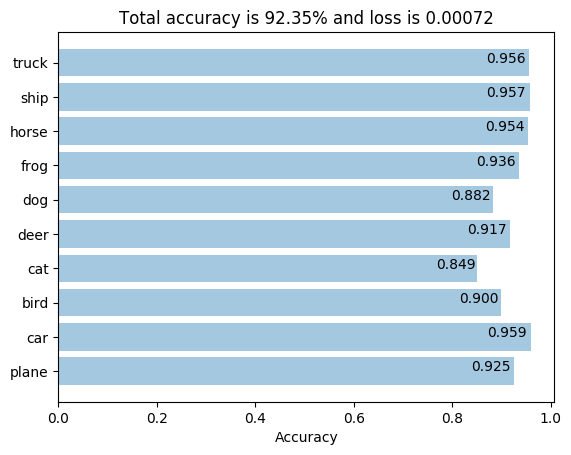

In [15]:
#Set the model in evaluation mode
net.eval()

test_loss = 0
correctpred = np.zeros(len(classes))
errorpred = np.zeros(len(classes))

with torch.no_grad():  # loop over the dataset multiple times
    for i, (inputs, labels) in enumerate(testloader, 0):
        
        #change the type into cuda tensor 
        inputs = inputs.to(device) 
        labels = labels.to(device) 

        outputs = net(inputs)
        # select the class with highest probability
        _, pred = outputs.max(1)
        
        loss = criterion(outputs, labels)
        
        # print statistics
        test_loss += loss.item()
        
        prednp = pred.cpu().numpy()
        labelnp = labels.cpu().numpy()
        
        for idx in range(len(prednp)):
            if prednp[idx] == labelnp[idx]:
                correctpred[prednp[idx]] += 1
            else:
                errorpred[prednp[idx]] += 1
        
    
accupred = np.zeros(len(classes))
for idx in range(len(classes)):
    accupred[idx] = correctpred[idx] / (correctpred[idx] + errorpred[idx])

y_pos = np.arange(len(classes))

plt.rcdefaults()
plt.barh(y_pos, accupred, align='center', alpha=0.4)
plt.yticks(y_pos, classes)
plt.xlabel('Accuracy')

total_accuracy = correctpred.sum()/(correctpred.sum()+errorpred.sum()) * 100
test_loss = test_loss / TEST_SIZE
plt.title('Total accuracy is {:.2f}% and loss is {:.5f}'.format(total_accuracy, test_loss))

for xx, yy in zip(accupred, y_pos):
    plt.text(xx*0.95, yy, '{:.3f}'.format(xx), ha='center')

print('Total accuracy is {:.2f}% and loss is {:.5f}'.format(total_accuracy, test_loss))
print('For each class in cifar 10:')
for i in reversed(range(len(classes))):
    print(' Accuracy of {:5s} : {:.2f}%'.format(classes[i], accupred[i]*100))


In [16]:
print(net)

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer1): Sequential(
    (0): ResidualBlock(
      (left): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (shortcut): Sequential()
    )
    (1): ResidualBlock(
      (left): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace)

In [17]:
print(net.conv1.bias.data.cpu())

AttributeError: 'Sequential' object has no attribute 'bias'